In [204]:
#clear all varaibles
%reset

In [205]:
#Let's import math things
import numpy as np
from scipy import stats
# Import curve fitting package from scipy
from scipy.optimize import curve_fit
# Plotting
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
#Show progress
from tqdm.notebook import tqdm_notebook
#Random numbers
import random
# Multiprocessing
import multiprocessing as mp
import time

#from fbm import fbm, fgn
# from matplotlib import rc
#import colorama

plt.style.use('ggplot')  # Set plot style

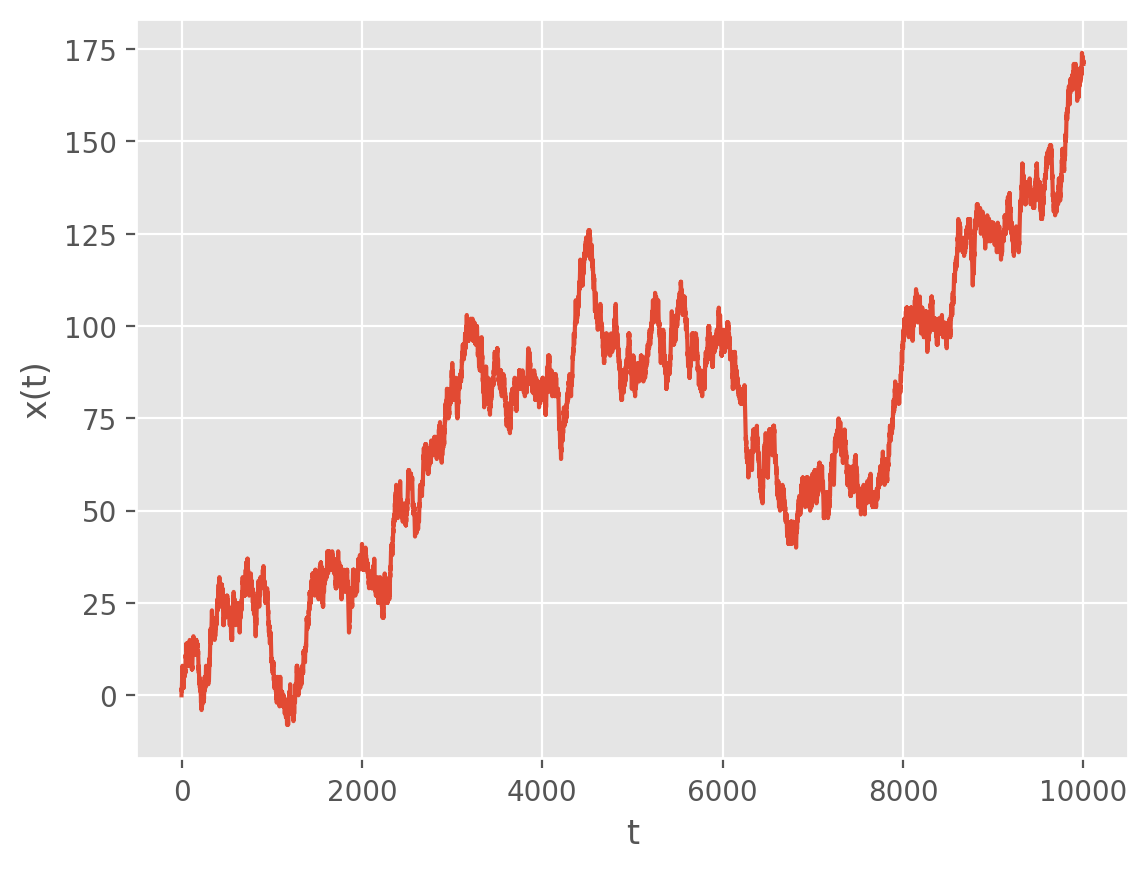

In [206]:
#allows you to use previously made functions for analysis
#%%capture

%run Diffusion-Entropy-Analysis/dea.ipynb

%run Analysis_Functions.ipynb

outerloop:   0%|          | 0/3 [00:00<?, ?it/s]

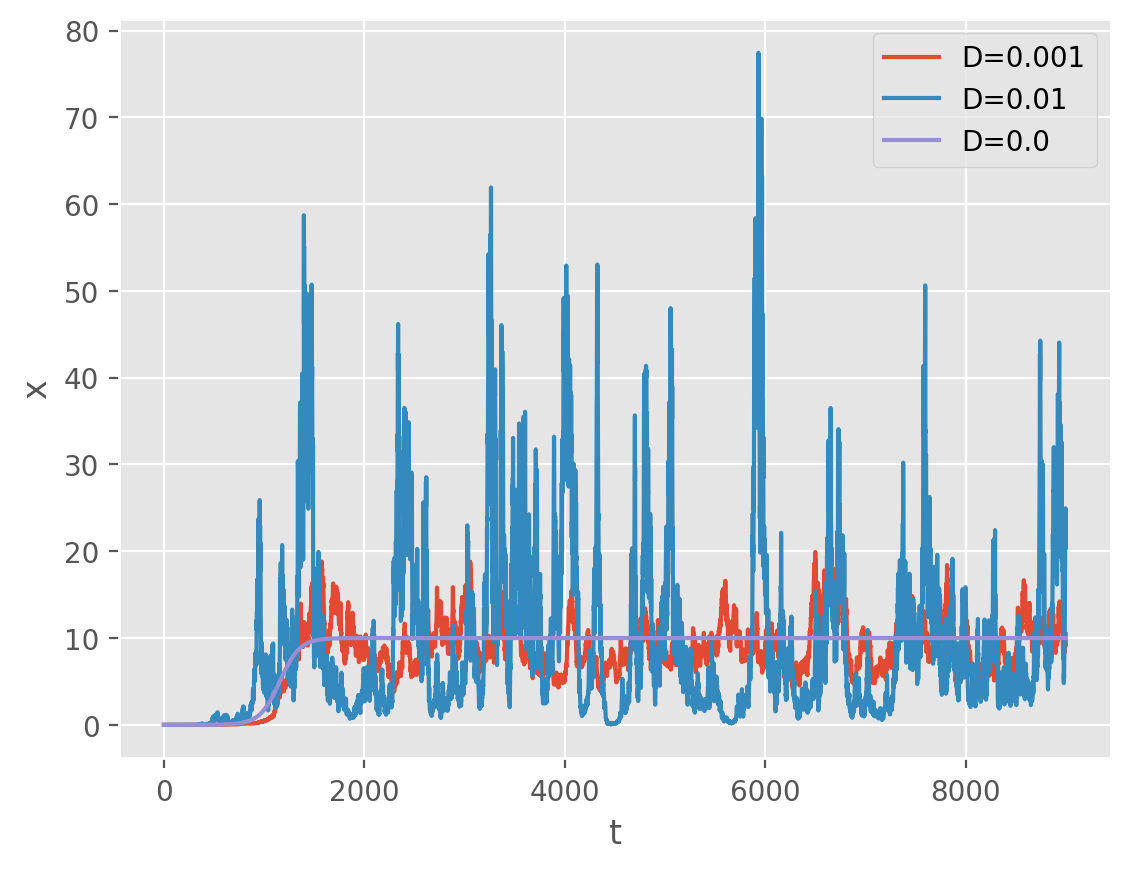

In [208]:
# First we will consider drawing may trajectories with the random walk function.

D = np.array([0.001,0.01, 0])

start = 0.0001
L = 9000

#x_trajs = np.zeros([len(D),L])

a = 0.01
b = 0.001
alpha = 0
lamb = 0
renew = False
plot = False

for q in tqdm_notebook(range(len(D)), desc='outerloop'):
    plt.plot(logistic_x(start,L,a,b,D[q],alpha,lamb,renew,plot), label = 'D='+str(D[q]))
plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc='upper right')
plt.show()

In [209]:
# First we will consider drawing may trajectories with the random walk function.

D = np.array([0.001,0.01, 0])

start = 0.0001
L = 9000

#x_trajs = np.zeros([len(D),L])

a = 0.01
b = 0.001
alpha = 0
lamb = 0
renew = False
plot = False

for q in tqdm_notebook(range(len(D)), desc='outerloop'):
    plt.plot(log_logistic(start=0.001,L=10**5,a=1,b=0.1,D=0,renew=True,plot, fpt=False), label = 'D='+str(D[q]))
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.show()

SyntaxError: positional argument follows keyword argument (430261956.py, line 18)

In [19]:
#start = 0.001
start = 10
L = 10**7
a = 0.01
b = 0.001
D = 0.0001
alpha = 0
lamb = 0
renew = True
plot = False


t0 = time.time()

x = logistic_x(start,L,a,b,D,alpha,lamb,renew,plot)
if np.any(x<0) == True:
    print('Negative value detected in '+ str(i) +' trajectory.')


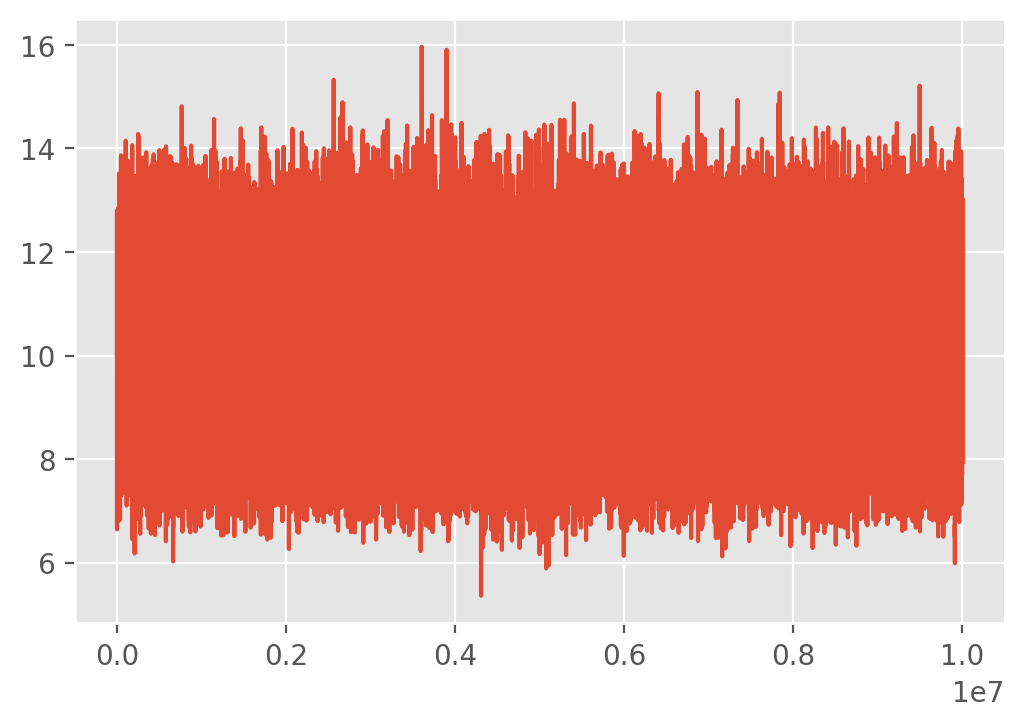

In [13]:
_=plt.plot(x)

In [14]:
number_of_points = 100 #may not repeat
data = x

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 93/93 [01:08<00:00,  1.35it/s]


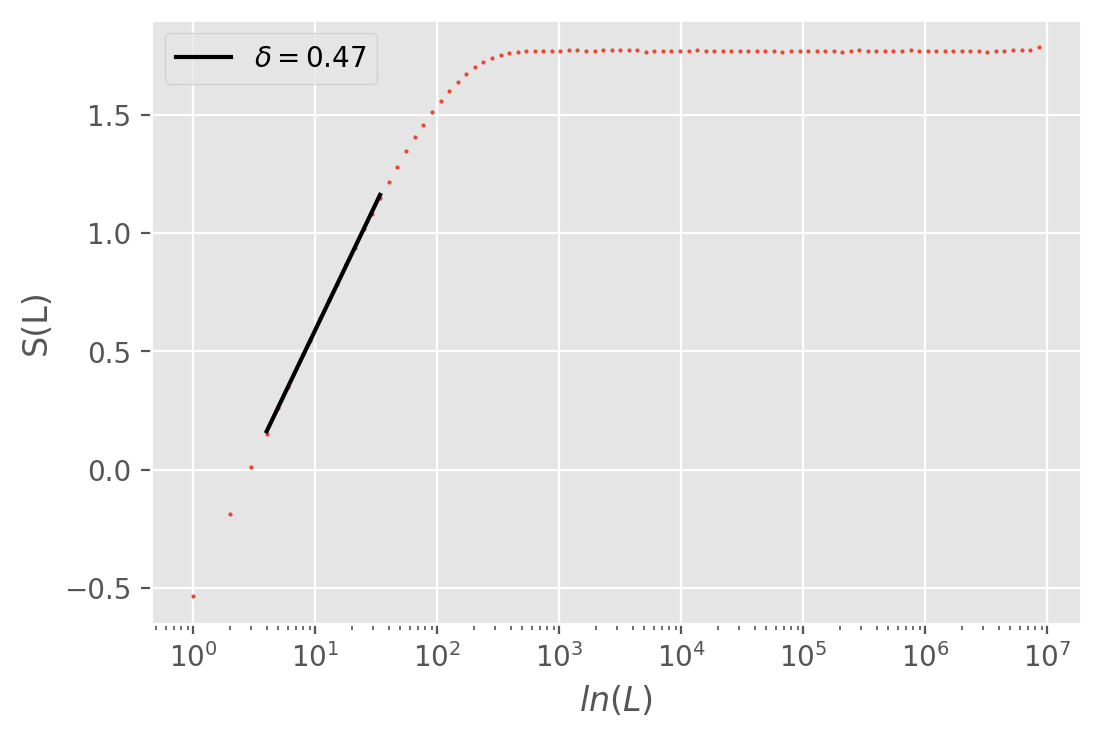

In [150]:
#for fitting and to get the scaling
start = 4*10**0
stop = 4*10**1
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [21]:
data = x
stripes = 1000
show_plot = False
window_type = 'moving'

rounded_data = apply_stripes(data, stripes, show_plot)
event_array = find_events(rounded_data)
diffusion_trajectory = make_trajectory(event_array)
#window_lengths = np.arange(1, int(0.25*max(np.shape(diffusion_trajectory))), 1500) #1000 points
taus = np.diff(np.where(np.array(event_array[0]) == 1))
window_lengths = np.unique(np.round(np.exp(np.linspace(np.log(np.min(taus)), np.log(np.where(np.array(event_array[0])==1)[0][-1]),100))).astype(int))
s, L = entropy(diffusion_trajectory, window_lengths, window_type)

100%|██████████| 94/94 [00:20<00:00,  4.57it/s]


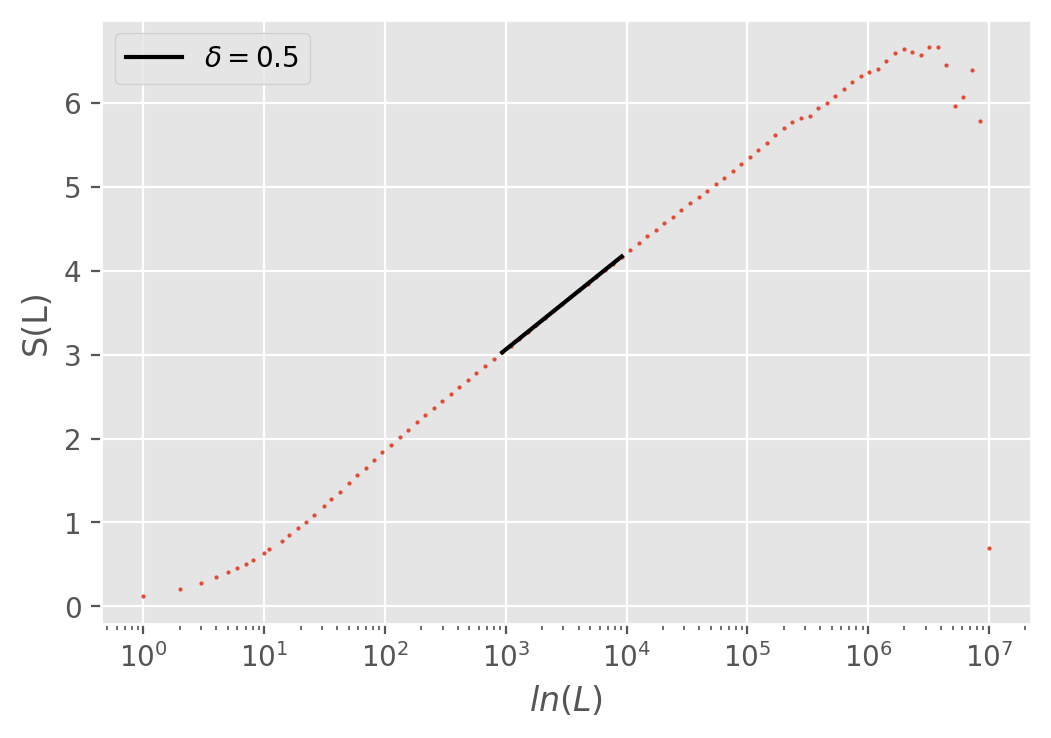

In [23]:
#for fitting and to get the scaling
start = 1*10**3
stop = 1*10**4
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [41]:
#start = 0.001
start = 10
L = 10**5
a = 0.01
b = 0.001
D = 0.0001
alpha = 0
lamb = 0
renew = True
plot = False

number_traj = 5000

x_matrix = np.zeros([number_traj,L])

t0 = time.time()

for i in tqdm_notebook(range(number_traj), desc='outer_loop'):
    x_matrix[i] = logistic_x(start,L,a,b,D,alpha,lamb,renew,plot)
    if np.any(x_matrix[i]<0) == True:
        print('Negative value detected in '+ str(i) +' trajectory.')
        
t1 = time.time()
print(f'Execution time {t1 - t0} s')

outer_loop:   0%|          | 0/5000 [00:00<?, ?it/s]

Execution time 1261.8985159397125 s


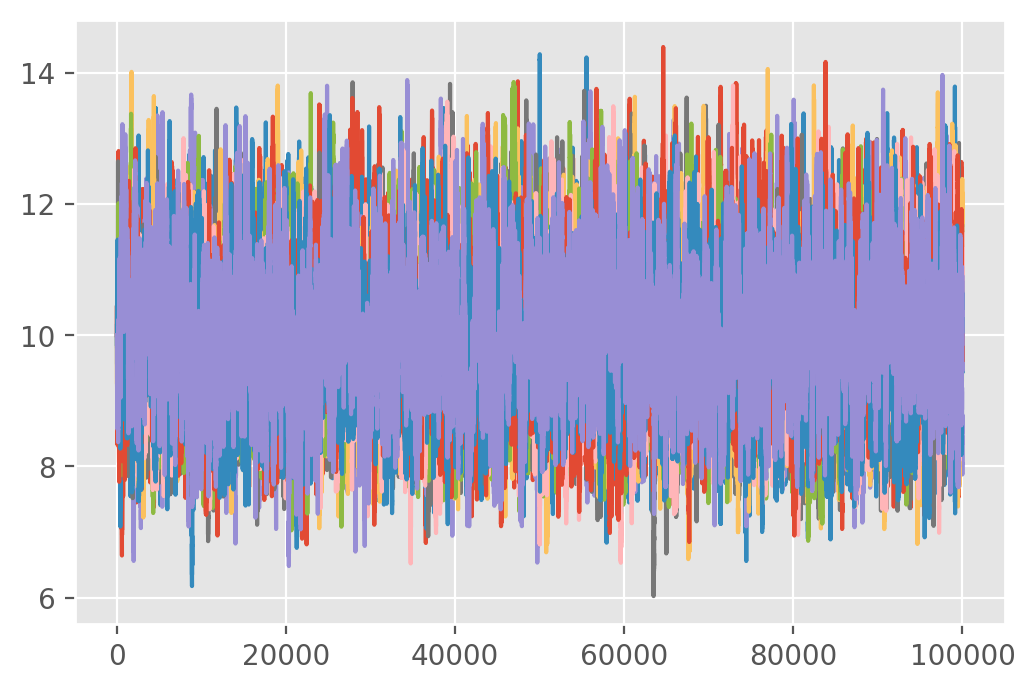

In [16]:
_=plt.plot(x_matrix[:10].T)

In [25]:
number_of_points = 100 #may not repeat
data = x_matrix

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 81/81 [00:00<00:00, 253.05it/s]


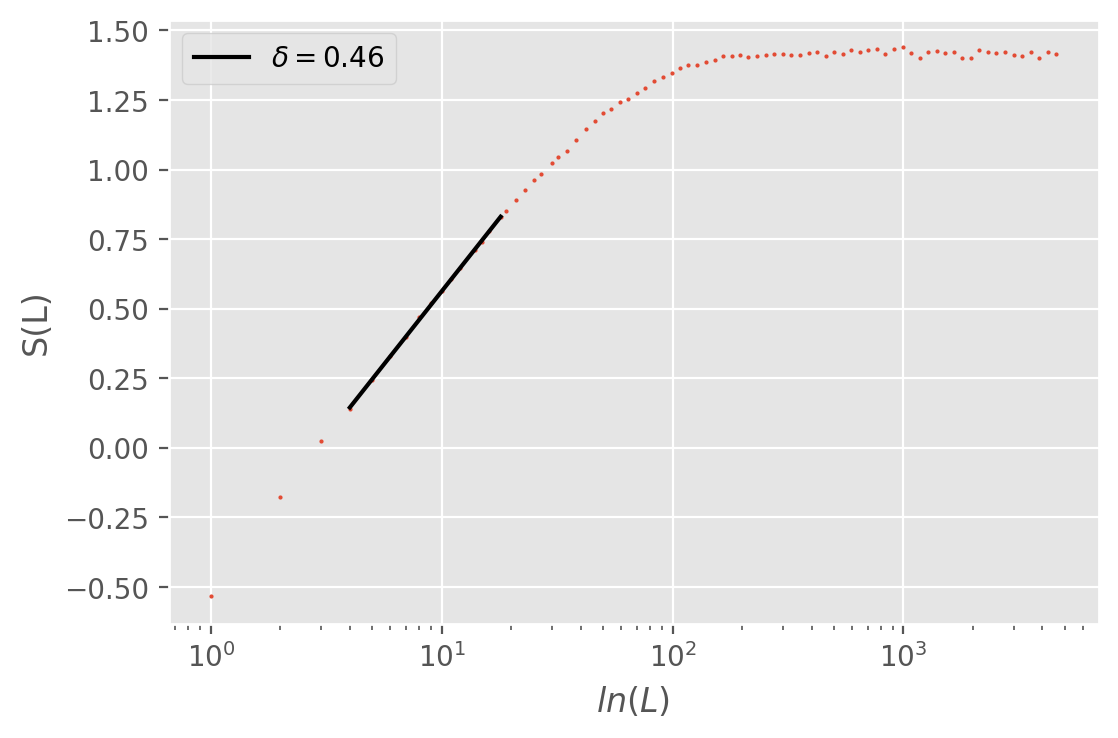

In [26]:
#for fitting and to get the scaling
start = 4*10**0
stop = 2*10**1
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [42]:
data = x_matrix
stripes = 1000
show_plot = False
window_type = 'growing'

rounded_data = apply_stripes(data, stripes, show_plot)
event_array = find_events(rounded_data)
diffusion_trajectory = make_trajectory(event_array)
#window_lengths = np.arange(1, int(0.25*max(np.shape(diffusion_trajectory))), 1500) #1000 points
taus = np.diff(np.where(np.array(event_array[0]) == 1))
window_lengths = np.unique(np.round(np.exp(np.linspace(np.log(np.min(taus)), np.log(np.where(np.array(event_array[0])==1)[0][-1]),100))).astype(int))
s, L = entropy(diffusion_trajectory, window_lengths, window_type)

100%|██████████| 89/89 [00:00<00:00, 534.39it/s]


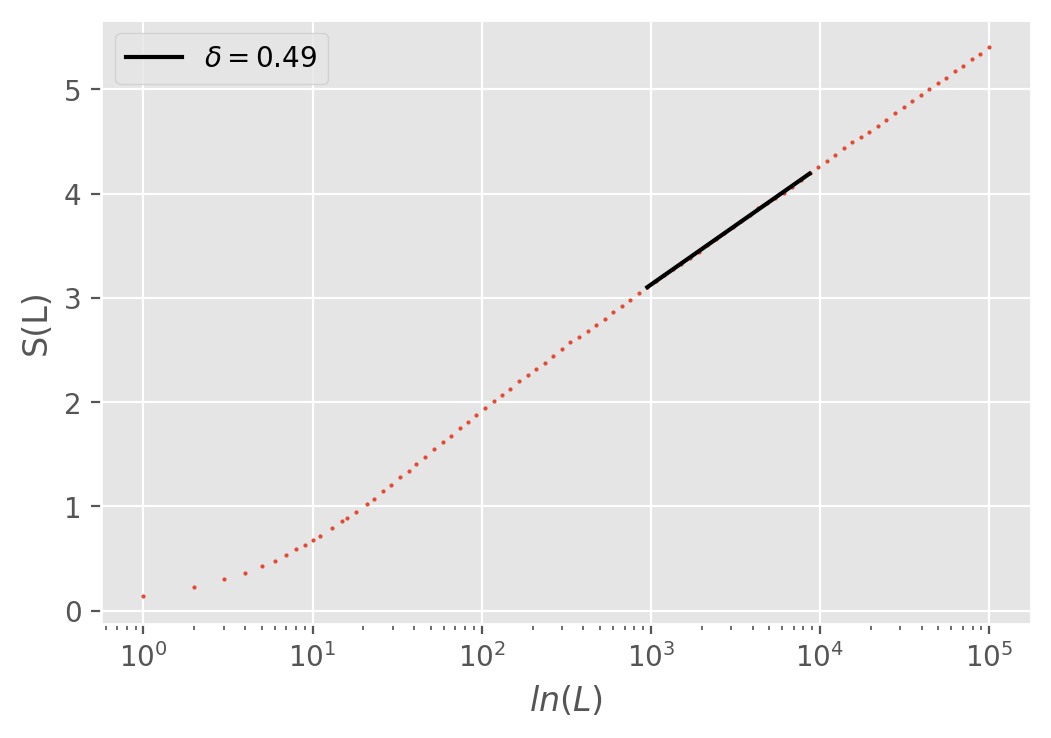

In [44]:
#for fitting and to get the scaling
start = 1*10**3
stop = 1*10**4
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

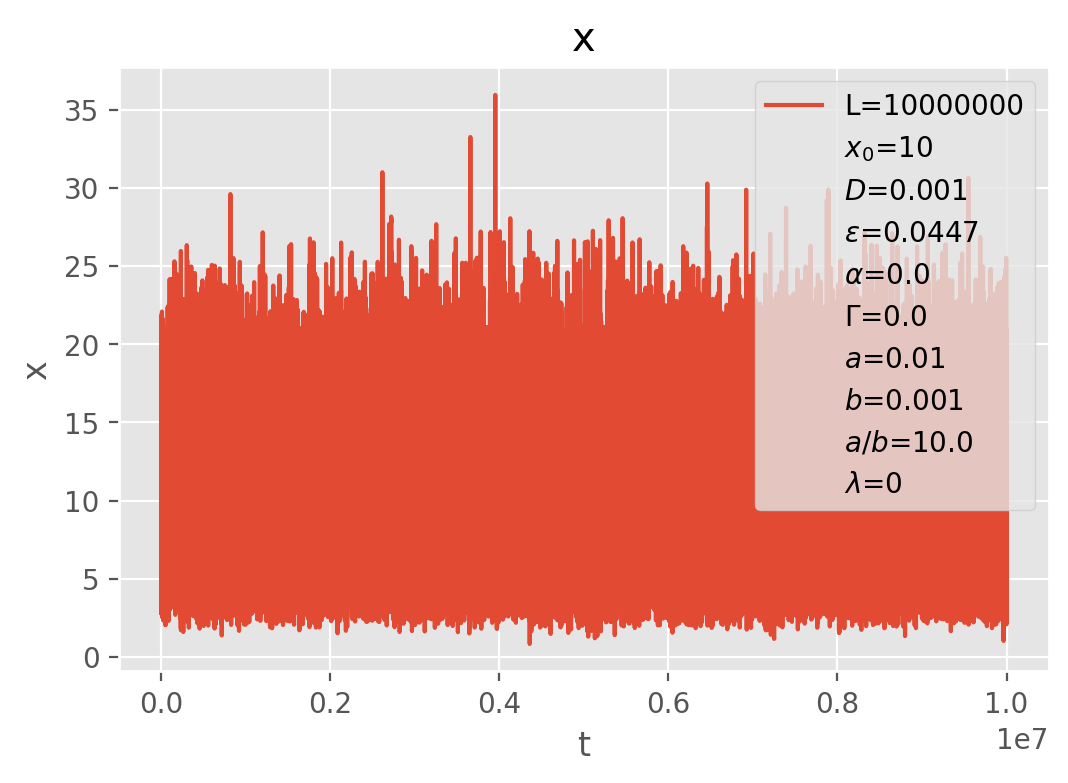

In [84]:
#start = 0.001
start = 10
L = 10**7
a = 0.01
b = 0.001
D = 0.001
alpha = 0
lamb = 0
renew = True
plot = True


t0 = time.time()

x = logistic_x(start,L,a,b,D,alpha,lamb,renew,plot)
if np.any(x<0) == True:
    print('Negative value detected in '+ str(i) +' trajectory.')

In [85]:
number_of_points = 100 #may not repeat
data = x

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 93/93 [01:01<00:00,  1.51it/s]


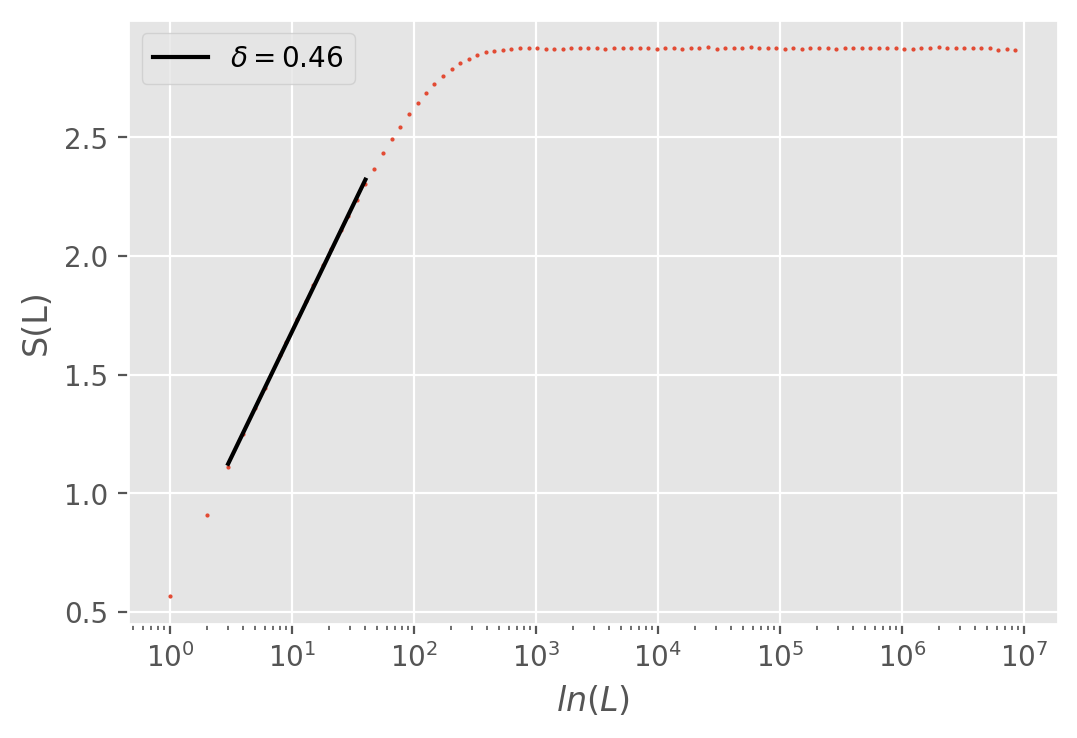

In [87]:
#for fitting and to get the scaling
start = 3*10**0
stop = 5*10**1
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [57]:
data = x
stripes = 1000
show_plot = False
window_type = 'moving'

rounded_data = apply_stripes(data, stripes, show_plot)
event_array = find_events(rounded_data)
diffusion_trajectory = make_trajectory(event_array)
#window_lengths = np.arange(1, int(0.25*max(np.shape(diffusion_trajectory))), 1500) #1000 points
taus = np.diff(np.where(np.array(event_array[0]) == 1))
window_lengths = np.unique(np.round(np.exp(np.linspace(np.log(np.min(taus)), np.log(np.where(np.array(event_array[0])==1)[0][-1]),100))).astype(int))
s, L = entropy(diffusion_trajectory, window_lengths, window_type)

100%|██████████| 94/94 [00:20<00:00,  4.50it/s]


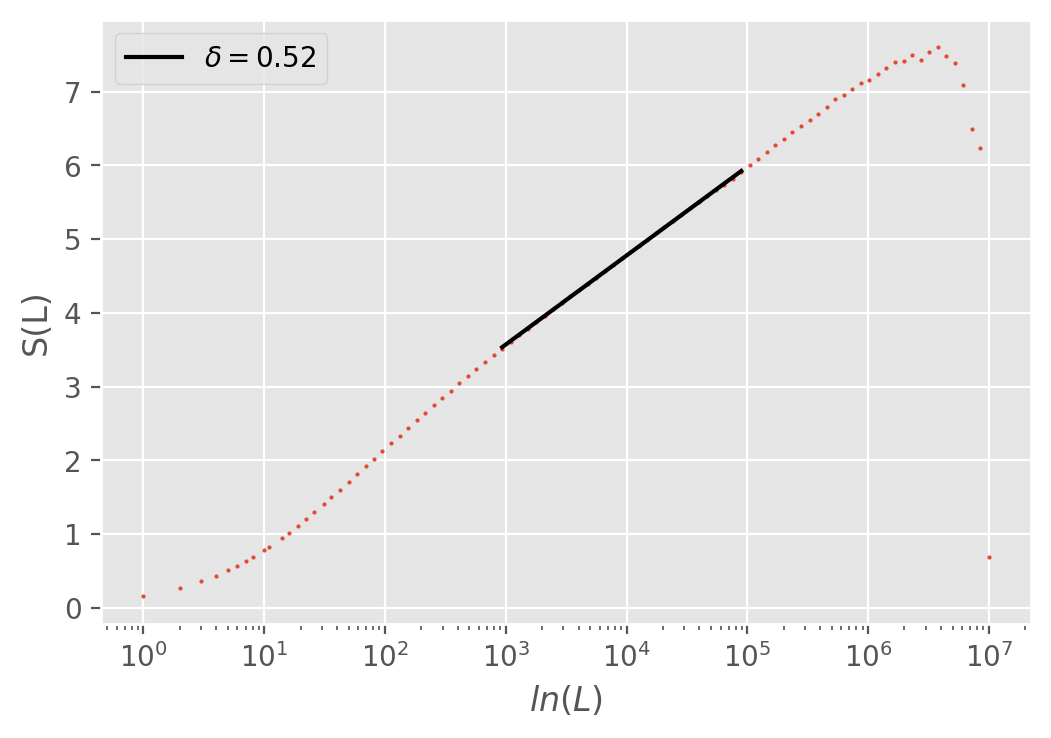

In [60]:
#for fitting and to get the scaling
start = 1*10**3
stop = 1*10**5
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [88]:
#start = 0.001
start = 10
L = 10**5
a = 0.01
b = 0.001
D = 0.001
alpha = 0
lamb = 0
renew = True
plot = False

number_traj = 5000

x_matrix = np.zeros([number_traj,L])

t0 = time.time()

for i in tqdm_notebook(range(number_traj), desc='outer_loop'):
    x_matrix[i] = logistic_x(start,L,a,b,D,alpha,lamb,renew,plot)
    if np.any(x_matrix[i]<0) == True:
        print('Negative value detected in '+ str(i) +' trajectory.')
        
t1 = time.time()
print(f'Execution time {t1 - t0} s')

outer_loop:   0%|          | 0/5000 [00:00<?, ?it/s]

Execution time 1285.1190831661224 s


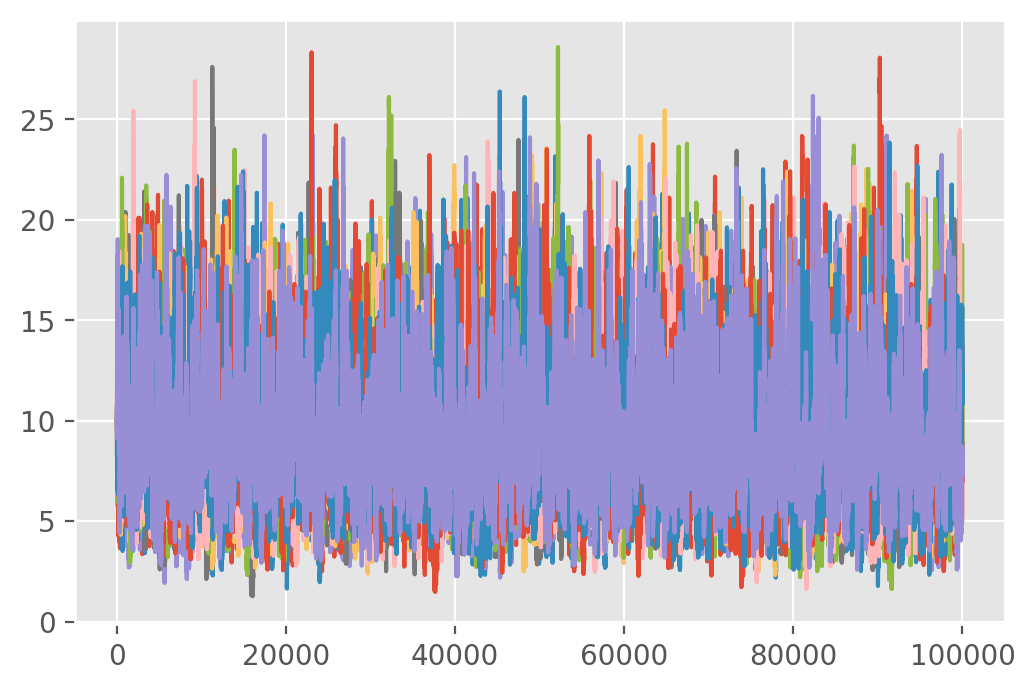

In [63]:
_=plt.plot(x_matrix[:10].T)

In [64]:
number_of_points = 100 #may not repeat
data = x_matrix

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 81/81 [00:00<00:00, 269.18it/s]


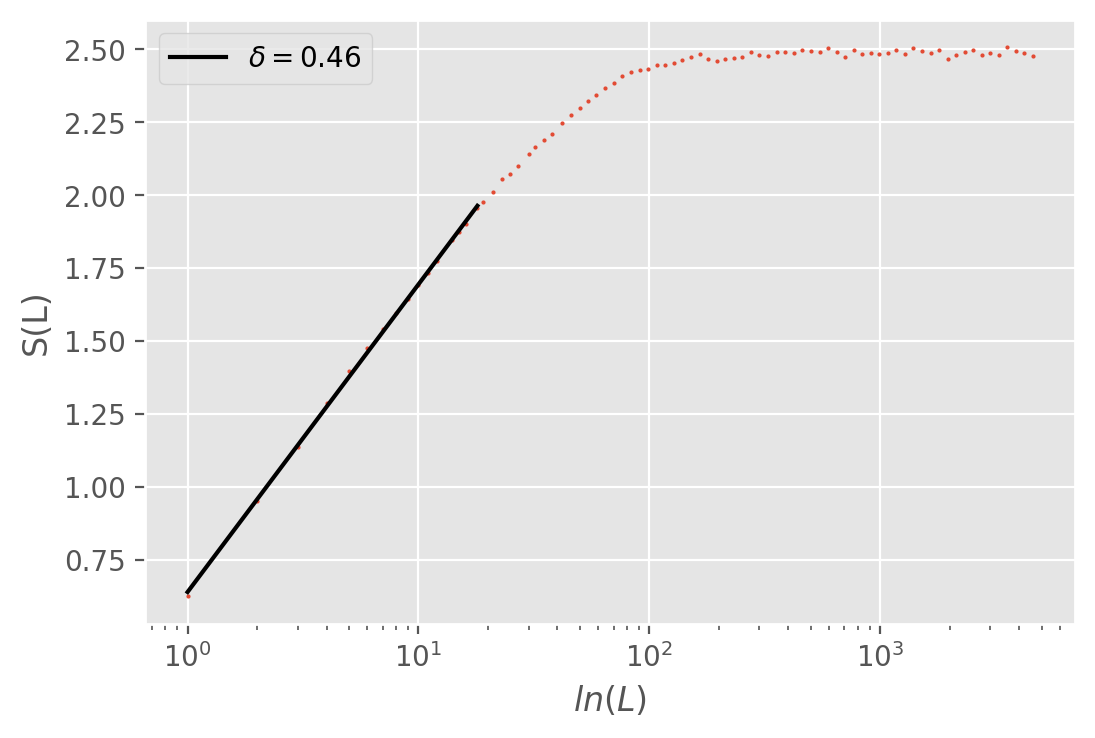

In [69]:
#for fitting and to get the scaling
start = 1*10**0
stop = 2*10**1
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [93]:
data = x_matrix
stripes = 50000
show_plot = False
window_type = 'growing'

rounded_data = apply_stripes(data, stripes, show_plot)
event_array = find_events(rounded_data)
diffusion_trajectory = make_trajectory(event_array)
#window_lengths = np.arange(1, int(0.25*max(np.shape(diffusion_trajectory))), 1500) #1000 points
taus = np.diff(np.where(np.array(event_array[0]) == 1))
window_lengths = np.unique(np.round(np.exp(np.linspace(np.log(np.min(taus)), np.log(np.where(np.array(event_array[0])==1)[0][-1]),100))).astype(int))
s, L = entropy(diffusion_trajectory, window_lengths, window_type)

100%|██████████| 89/89 [00:00<00:00, 365.58it/s]


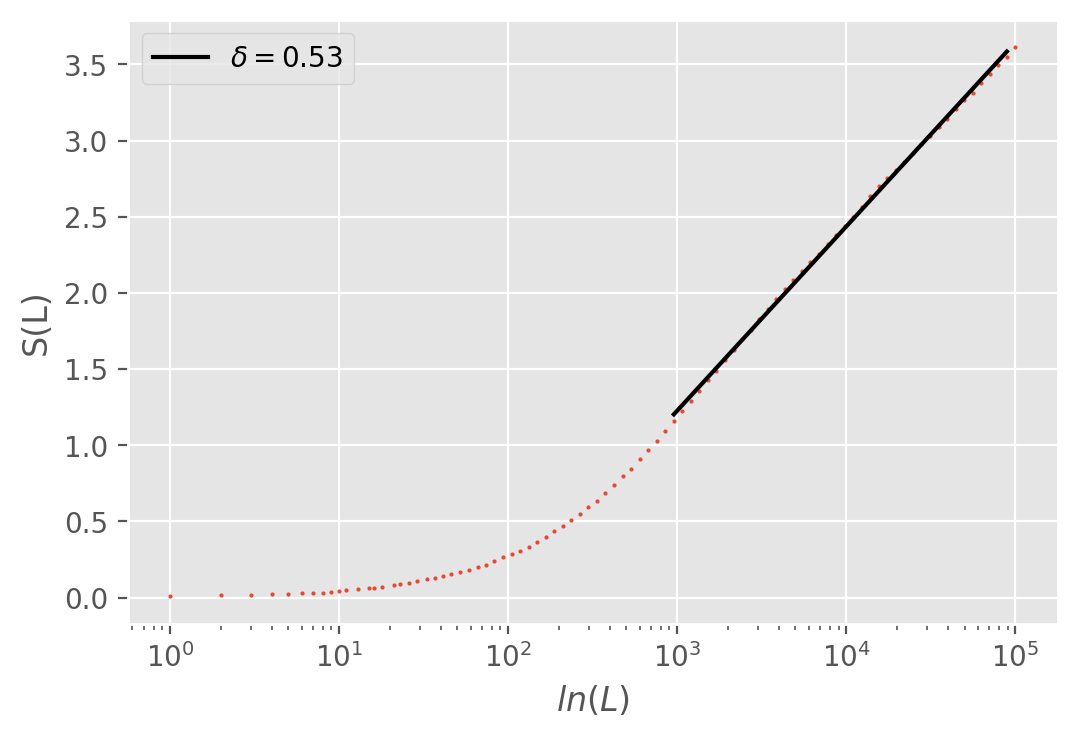

In [98]:
#for fitting and to get the scaling
start = 1*10**3
stop = 1*10**5
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

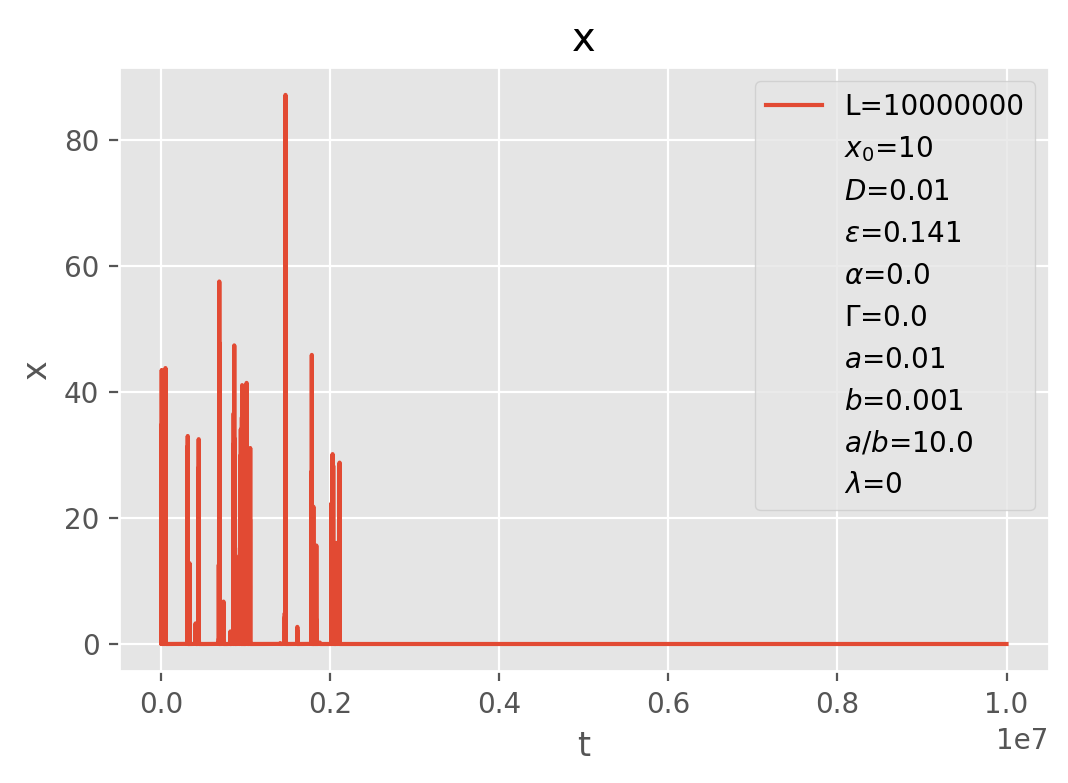

In [106]:
#start = 0.001
start = 10
L = 10**7
a = 0.01
b = 0.001
D = 0.01
alpha = 0
lamb = 0
renew = True
plot = True


t0 = time.time()

x = logistic_x(start,L,a,b,D,alpha,lamb,renew,plot)
if np.any(x<0) == True:
    print('Negative value detected in '+ str(i) +' trajectory.')

In [107]:
number_of_points = 100 #may not repeat
data = x

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 93/93 [01:04<00:00,  1.45it/s]


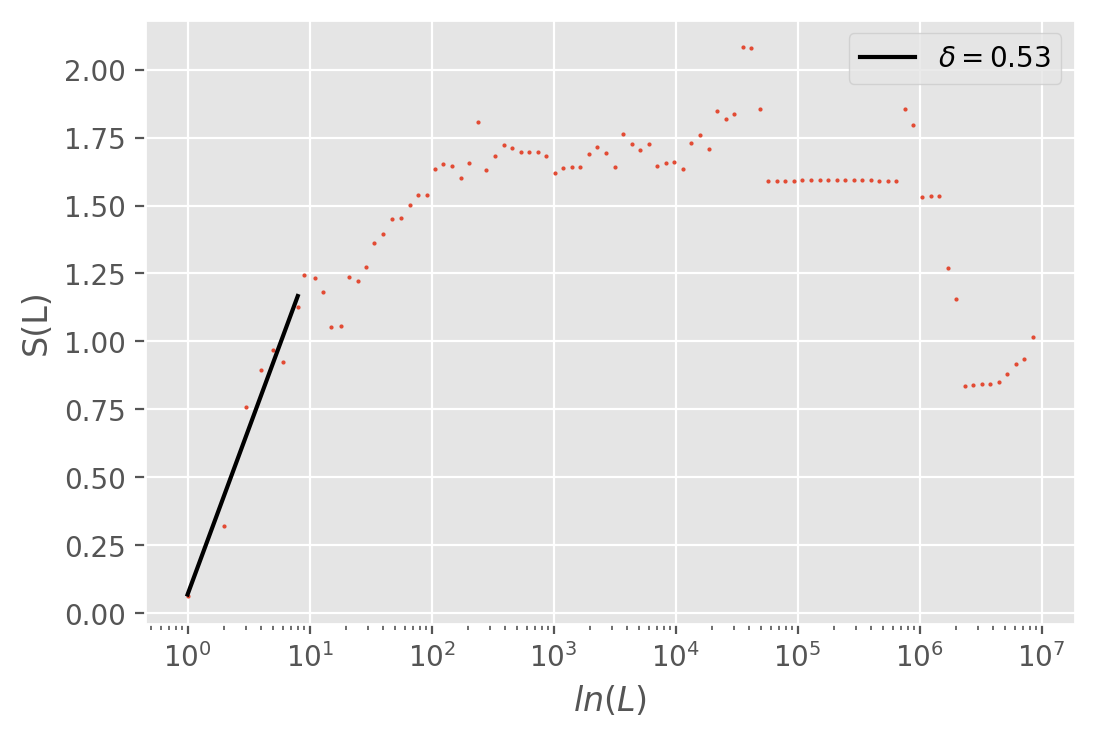

In [108]:
#for fitting and to get the scaling
start = 1*10**0
stop = 1*10**1
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [122]:
data = x
stripes = 5000
show_plot = False
window_type = 'moving'

rounded_data = apply_stripes(data, stripes, show_plot)
event_array = find_events(rounded_data)
diffusion_trajectory = make_trajectory(event_array)
#window_lengths = np.arange(1, int(0.25*max(np.shape(diffusion_trajectory))), 1500) #1000 points
taus = np.diff(np.where(np.array(event_array[0]) == 1))
window_lengths = np.unique(np.round(np.exp(np.linspace(np.log(np.min(taus)), np.log(np.where(np.array(event_array[0])==1)[0][-1]),100))).astype(int))
s, L = entropy(diffusion_trajectory, window_lengths, window_type)

100%|██████████| 93/93 [00:27<00:00,  3.44it/s]


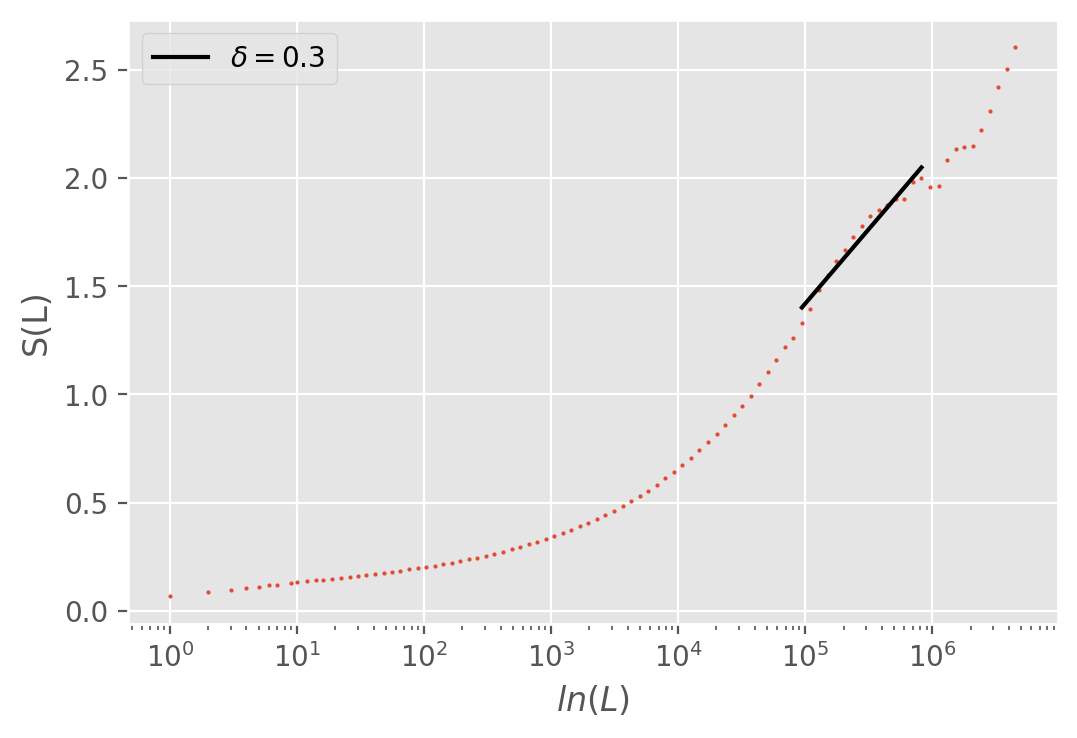

In [124]:
#for fitting and to get the scaling
start = 1*10**5
stop = 1*10**6
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [125]:
#start = 0.001
start = 10
L = 10**5
a = 0.01
b = 0.001
D = 0.01
alpha = 0
lamb = 0
renew = True
plot = False

number_traj = 5000

x_matrix = np.zeros([number_traj,L])

t0 = time.time()

for i in tqdm_notebook(range(number_traj), desc='outer_loop'):
    x_matrix[i] = logistic_x(start,L,a,b,D,alpha,lamb,renew,plot)
    if np.any(x_matrix[i]<0) == True:
        print('Negative value detected in '+ str(i) +' trajectory.')
        
t1 = time.time()
print(f'Execution time {t1 - t0} s')

outer_loop:   0%|          | 0/5000 [00:00<?, ?it/s]

Execution time 1659.9888038635254 s


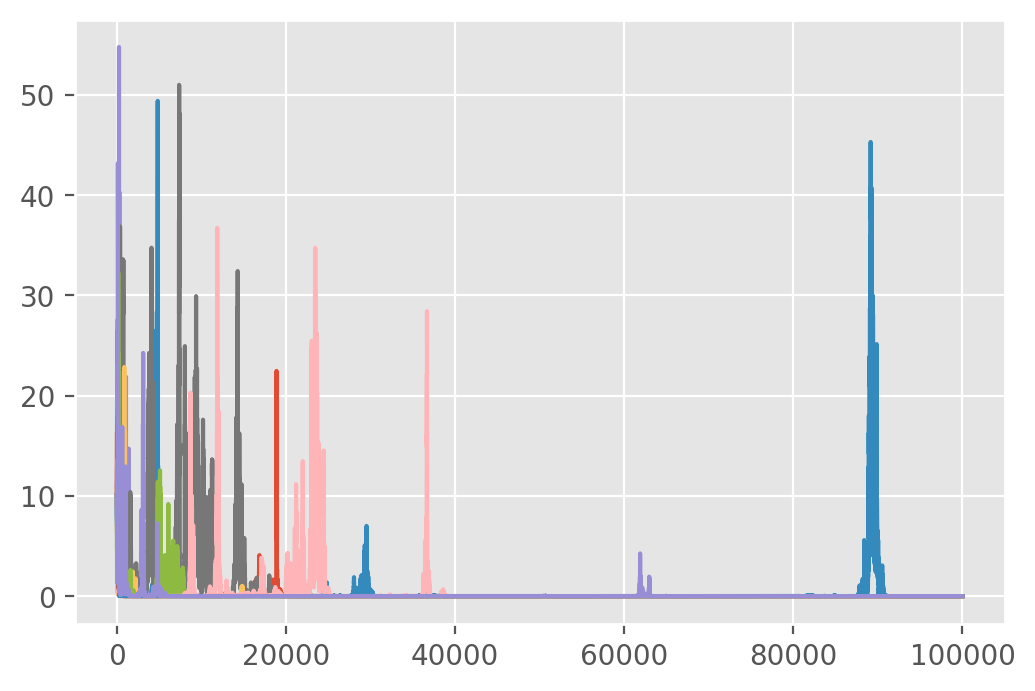

In [127]:
_=plt.plot(x_matrix[:10].T)

In [128]:
number_of_points = 100 #may not repeat
data = x_matrix

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 81/81 [00:00<00:00, 87.66it/s] 


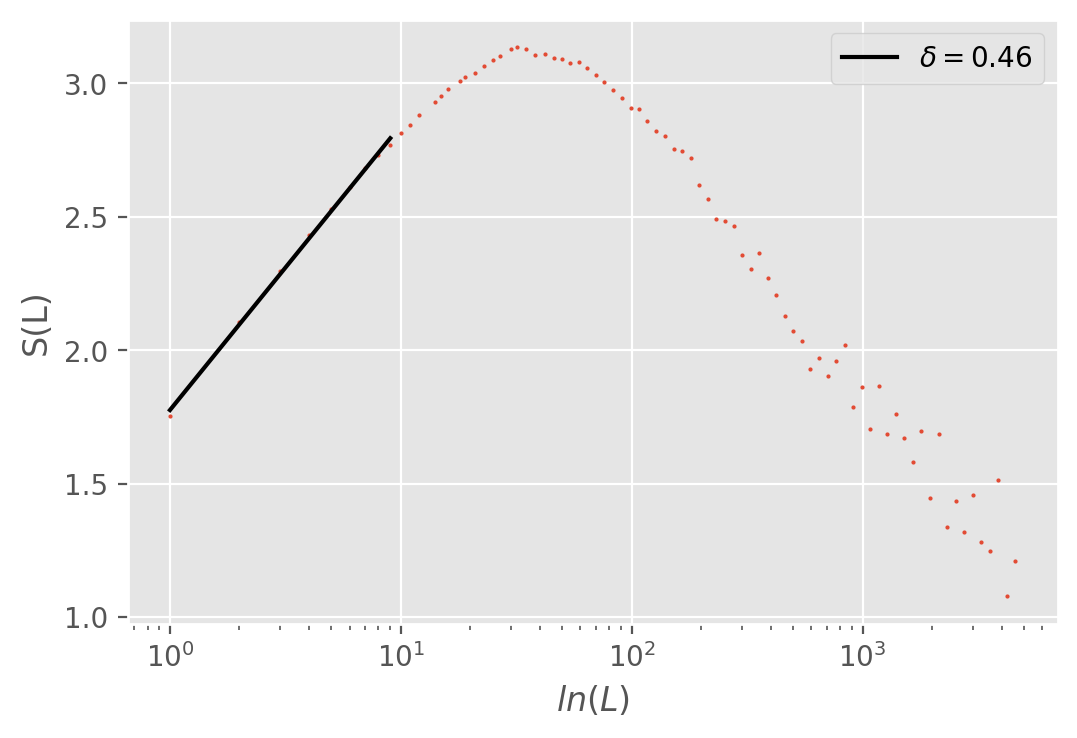

In [134]:
#for fitting and to get the scaling
start = 1*10**0
stop = 1*10**1
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [174]:
data = x_matrix
stripes = 100000
show_plot = False
window_type = 'growing'

rounded_data = apply_stripes(data, stripes, show_plot)
event_array = find_events(rounded_data)
diffusion_trajectory = make_trajectory(event_array)
#window_lengths = np.arange(1, int(0.25*max(np.shape(diffusion_trajectory))), 1500) #1000 points
taus = np.diff(np.where(np.array(event_array[0]) == 1))
window_lengths = np.unique(np.round(np.exp(np.linspace(np.log(np.min(taus)), np.log(np.where(np.array(event_array[0])==1)[0][-1]),100))).astype(int))
s, L = entropy(diffusion_trajectory, window_lengths, window_type)

100%|██████████| 89/89 [00:00<00:00, 549.58it/s]


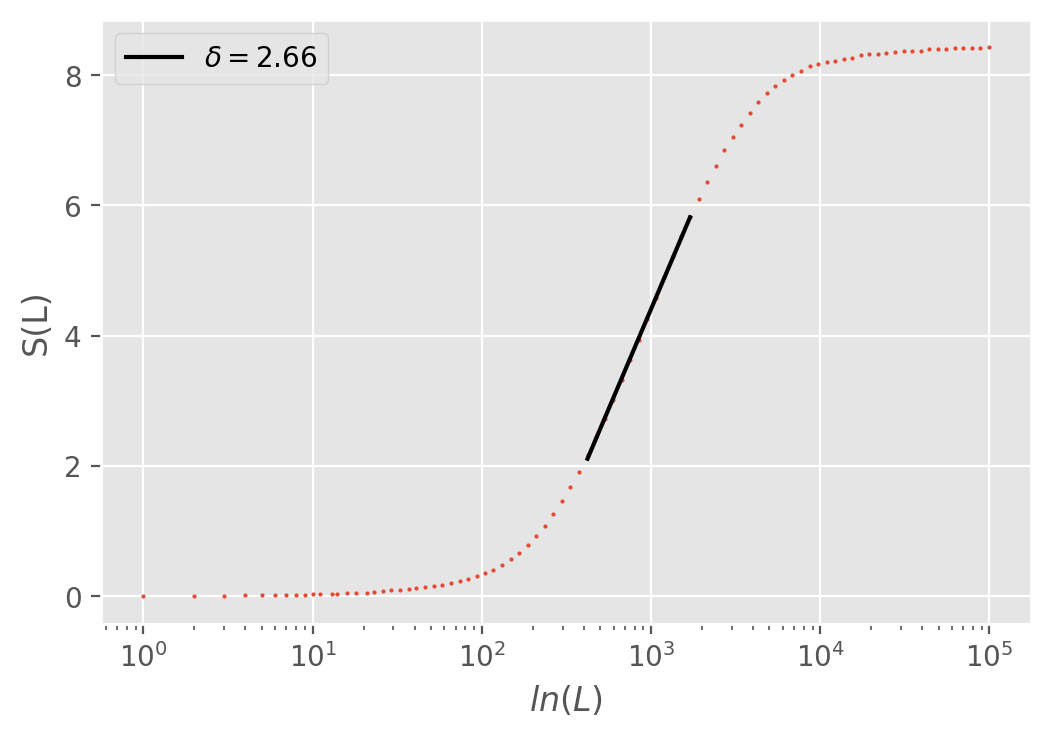

In [179]:
#for fitting and to get the scaling
start = 4*10**2
stop = 2*10**3
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

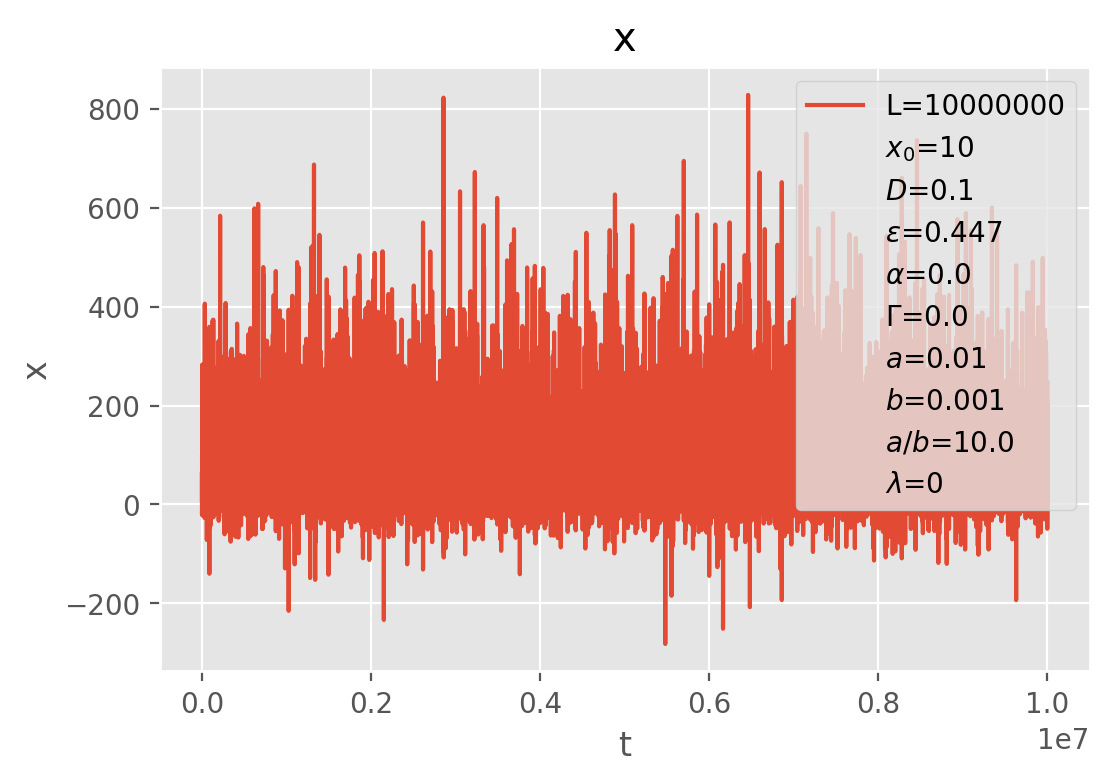

Negative value detected in 4999 trajectory.


In [180]:
#start = 0.001
start = 10
L = 10**7
a = 0.01
b = 0.001
D = 0.1
alpha = 0
lamb = 0
renew = True
plot = True


t0 = time.time()

x = logistic_x(start,L,a,b,D,alpha,lamb,renew,plot)
if np.any(x<0) == True:
    print('Negative value detected in '+ str(i) +' trajectory.')

In [181]:
number_of_points = 100 #may not repeat
data = x

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 93/93 [01:02<00:00,  1.49it/s]


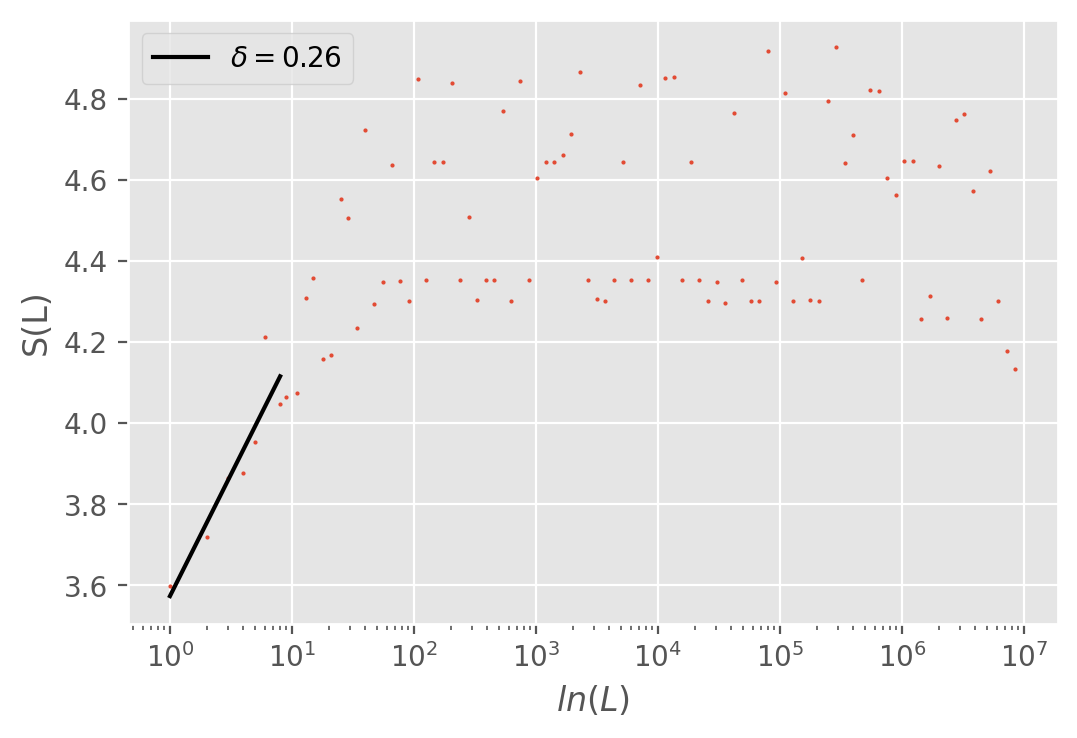

In [183]:
#for fitting and to get the scaling
start = 1*10*0
stop = 1*10**1
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [184]:
data = x
stripes = 1000
show_plot = False
window_type = 'moving'

rounded_data = apply_stripes(data, stripes, show_plot)
event_array = find_events(rounded_data)
diffusion_trajectory = make_trajectory(event_array)
#window_lengths = np.arange(1, int(0.25*max(np.shape(diffusion_trajectory))), 1500) #1000 points
taus = np.diff(np.where(np.array(event_array[0]) == 1))
window_lengths = np.unique(np.round(np.exp(np.linspace(np.log(np.min(taus)), np.log(np.where(np.array(event_array[0])==1)[0][-1]),100))).astype(int))
s, L = entropy(diffusion_trajectory, window_lengths, window_type)

100%|██████████| 94/94 [00:20<00:00,  4.49it/s]


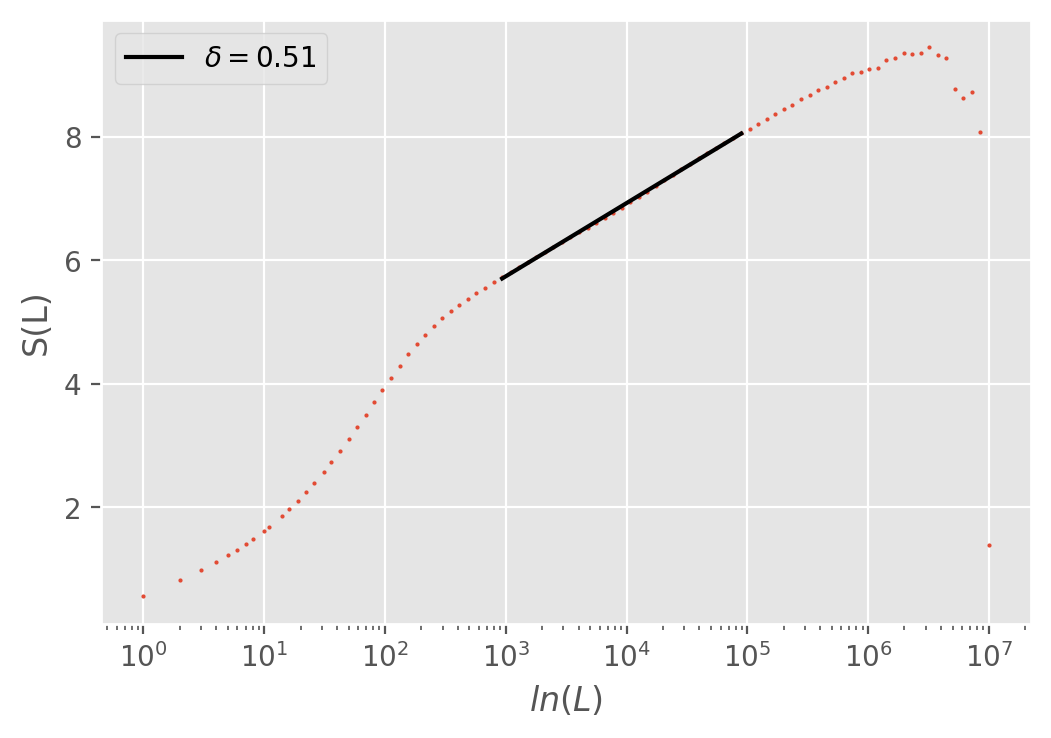

In [193]:
#for fitting and to get the scaling
start = 1*10**3
stop = 1*10**5
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [3]:
#start = 0.001
start = 10
L = 10**5
a = 0.01
b = 0.001
D = 0.1
alpha = 0
lamb = 0
renew = True
plot = False

number_traj = 5000

x_matrix = np.zeros([number_traj,L])

t0 = time.time()

for i in tqdm_notebook(range(number_traj), desc='outer_loop'):
    x_matrix[i] = logistic_x(start,L,a,b,D,alpha,lamb,renew,plot)
    
if np.any(x_matrix<0) == True:
    print('Negative value detected in matrix.')
        
t1 = time.time()
print(f'Execution time {t1 - t0} s')

outer_loop:   0%|          | 0/5000 [00:00<?, ?it/s]

Negative value detected in matrix.
Execution time 1264.2516460418701 s


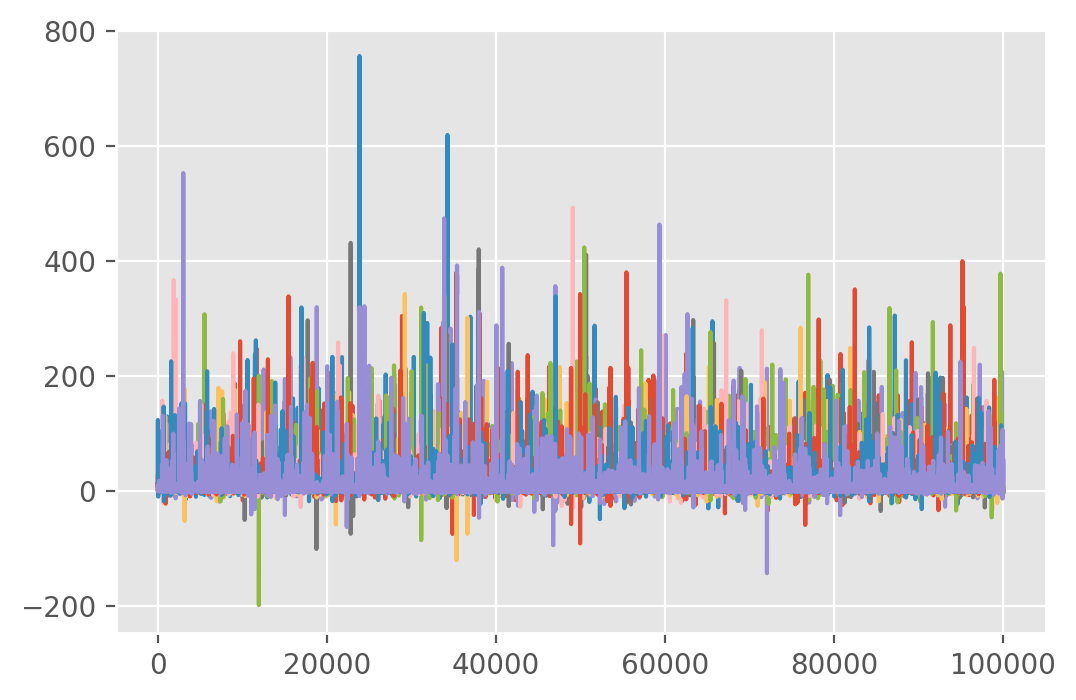

In [4]:
_=plt.plot(x_matrix[:10].T)

In [5]:
number_of_points = 100 #may not repeat
data = x_matrix

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 81/81 [00:00<00:00, 135.31it/s]


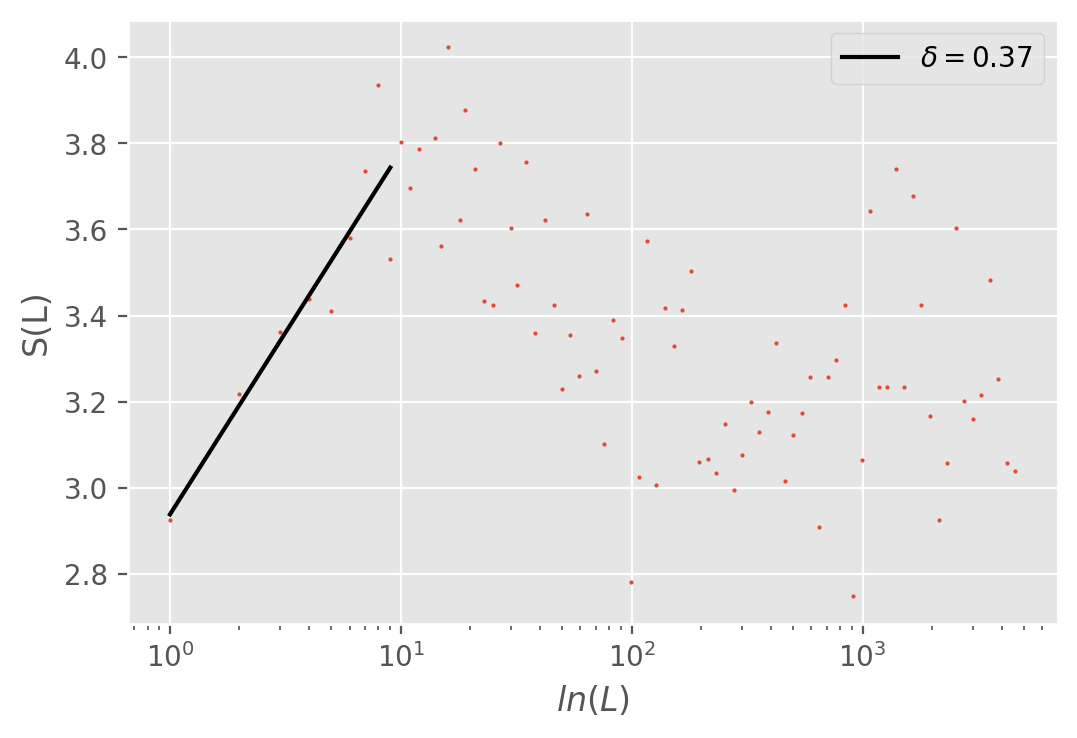

In [6]:
#for fitting and to get the scaling
start = 1*10**0
stop = 1*10**1
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [7]:
data = x_matrix
stripes = 1000
show_plot = False
window_type = 'growing'

rounded_data = apply_stripes(data, stripes, show_plot)
event_array = find_events(rounded_data)
diffusion_trajectory = make_trajectory(event_array)
#window_lengths = np.arange(1, int(0.25*max(np.shape(diffusion_trajectory))), 1500) #1000 points
taus = np.diff(np.where(np.array(event_array[0]) == 1))
window_lengths = np.unique(np.round(np.exp(np.linspace(np.log(np.min(taus)), np.log(np.where(np.array(event_array[0])==1)[0][-1]),100))).astype(int))
s, L = entropy(diffusion_trajectory, window_lengths, window_type)

100%|██████████| 89/89 [00:00<00:00, 237.22it/s]


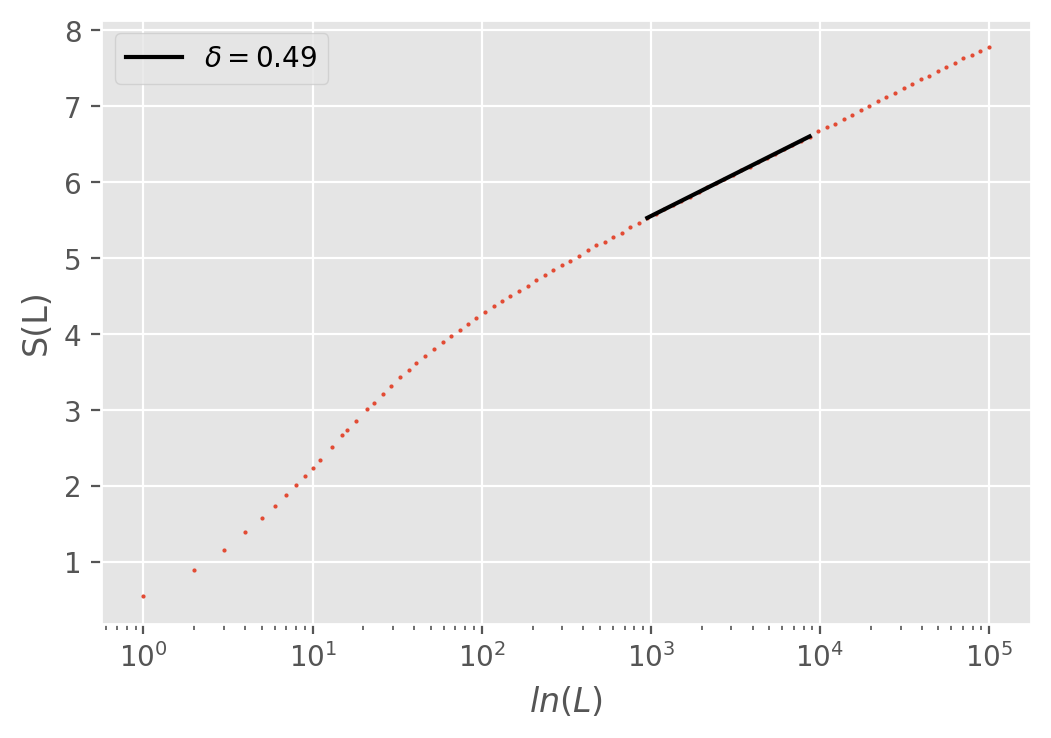

In [9]:
#for fitting and to get the scaling
start = 1*10**3
stop = 1*10**4
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

100%|██████████| 9999999/9999999 [00:29<00:00, 340646.17it/s]


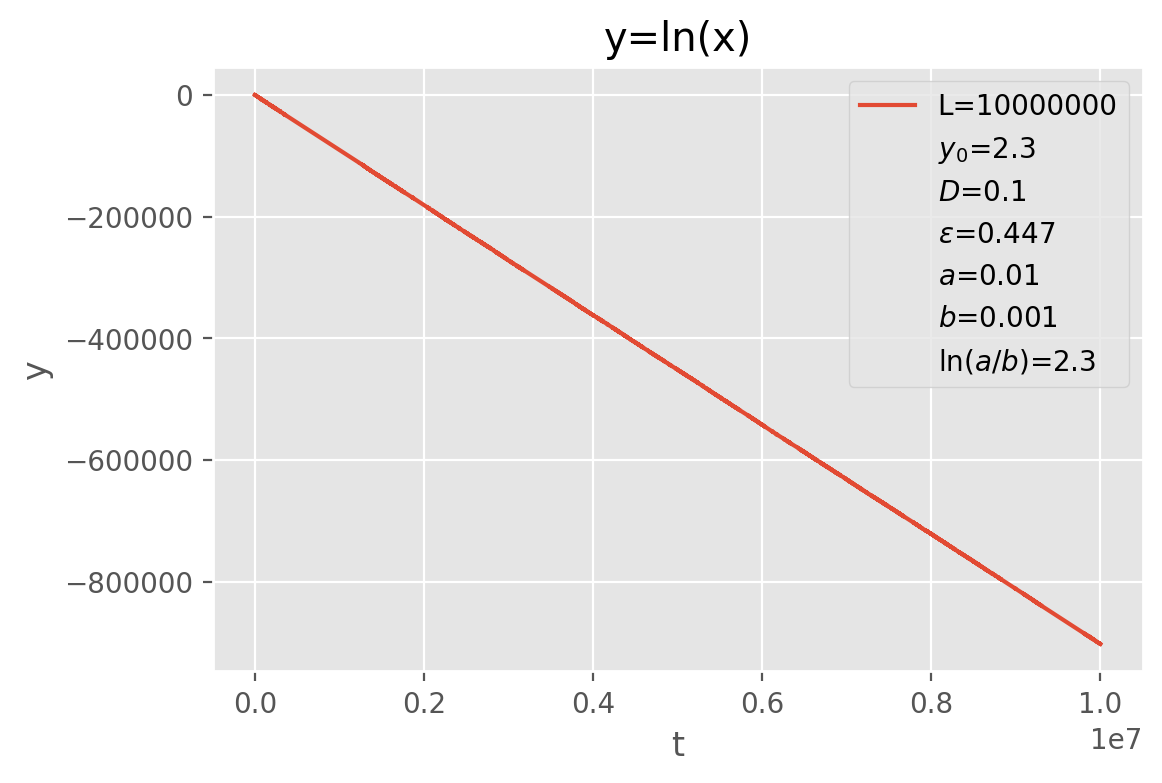

In [49]:
start = 2.3
L = 10**7
a = 0.01
b = 0.001
D = 0.1
alpha = 0
lamb = 0
renew = False
plot = True
log_x = log_logistic(start,L,a,b,D,renew=False,plot=True)

In [192]:
#start = 0.001
start = 2.3
L = 10**3
a = 0.01
b = 0.001
D = 0.0099
alpha = 0
lamb = 0
renew = False
plot = False

number_traj = 9000

y_matrix = np.zeros([number_traj,L])

for i in tqdm_notebook(range(number_traj), desc='outer_loop'):
    y_matrix[i] = log_logistic(start,L,a,b,D,renew,plot)
    #if np.any(x_matrix[i]<0) == True:
    #    print('Negative value detected in '+ str(i) +' trajectory.')
        

outer_loop:   0%|          | 0/9000 [00:00<?, ?it/s]

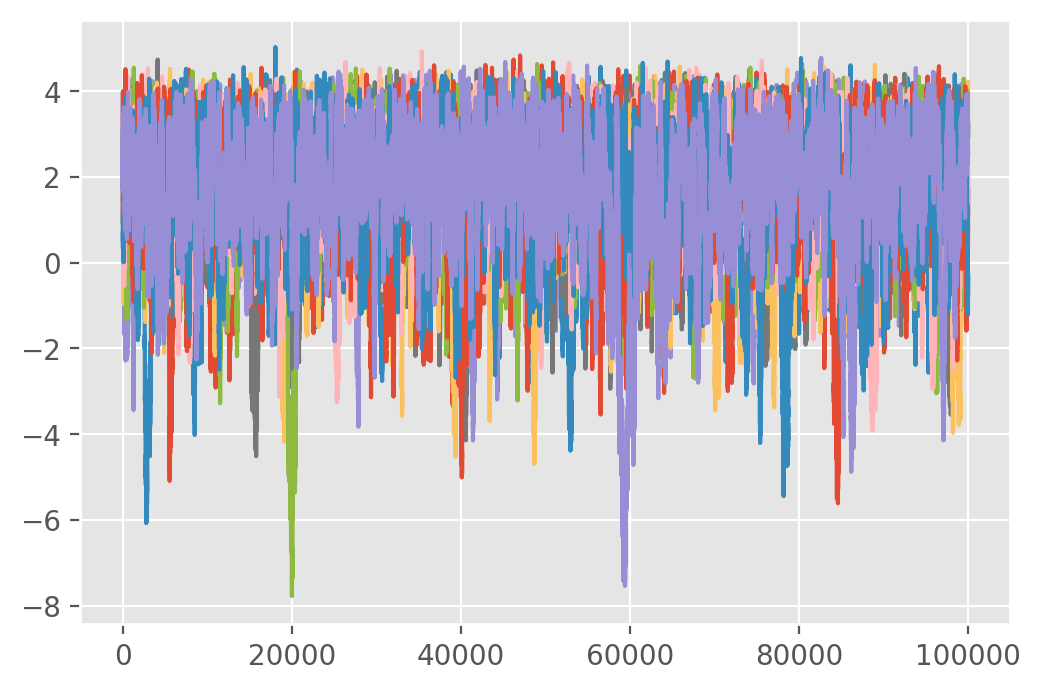

In [43]:
_=plt.plot(y_matrix[:10].T)

In [190]:
(a-D)/b

-89.00000000000001

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


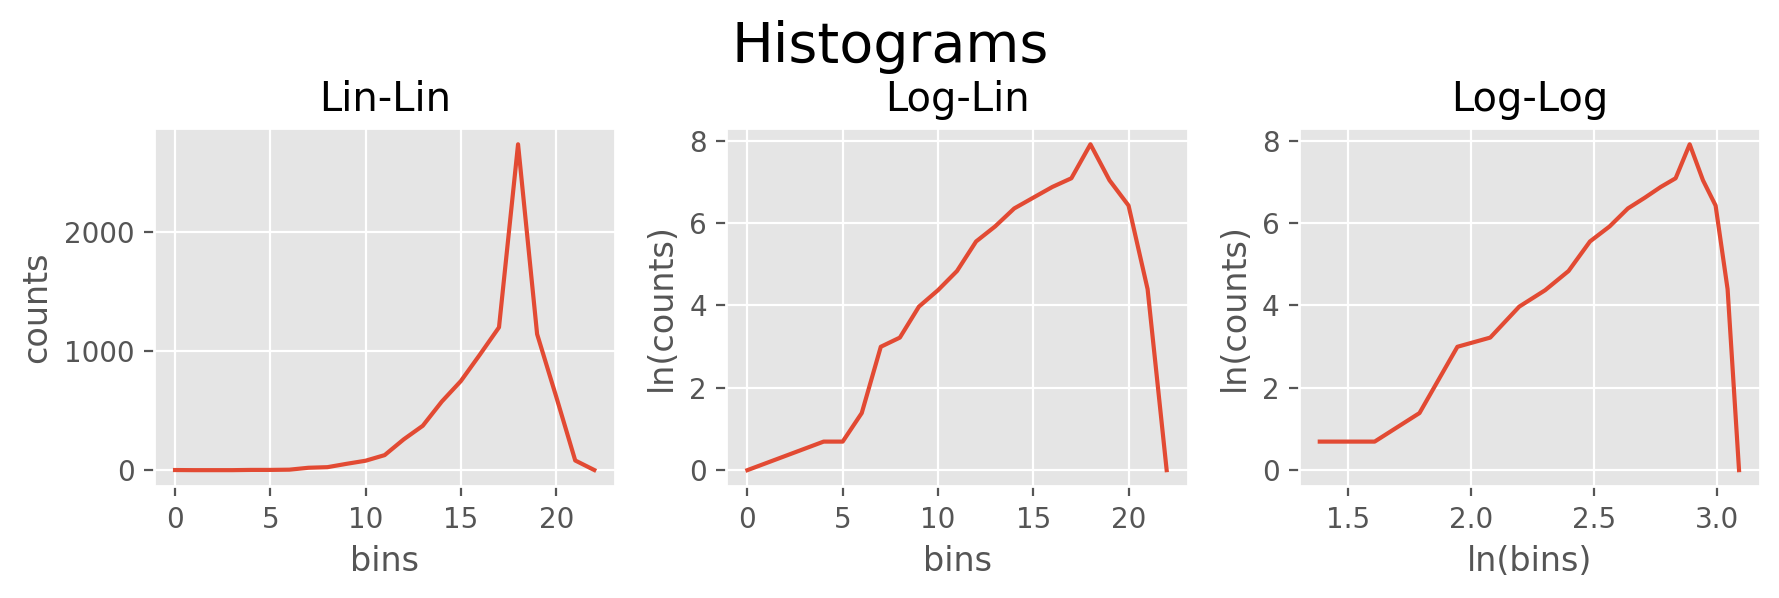

In [201]:
#eqilibrium distribution
ed = (y_matrix[:,-1]*1).astype(int)
no_neg_ed=ed-min(ed)
[bins, counts], [bins_n0, counts_n0] = bin_it(no_neg_ed)

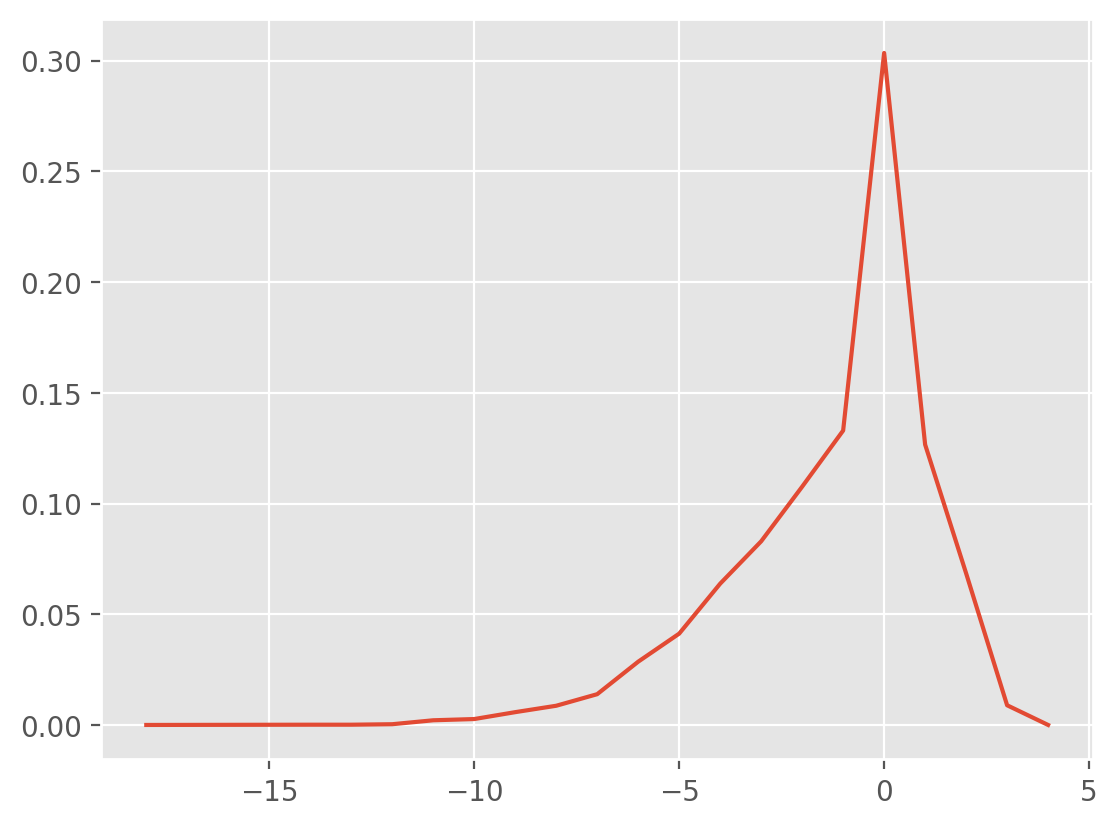

In [203]:
plt.plot(bins_n0+min(ed), counts_n0/sum(counts_n0))

In [198]:
bins_n0

array([ 0,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


(5.2102, -7.5722)

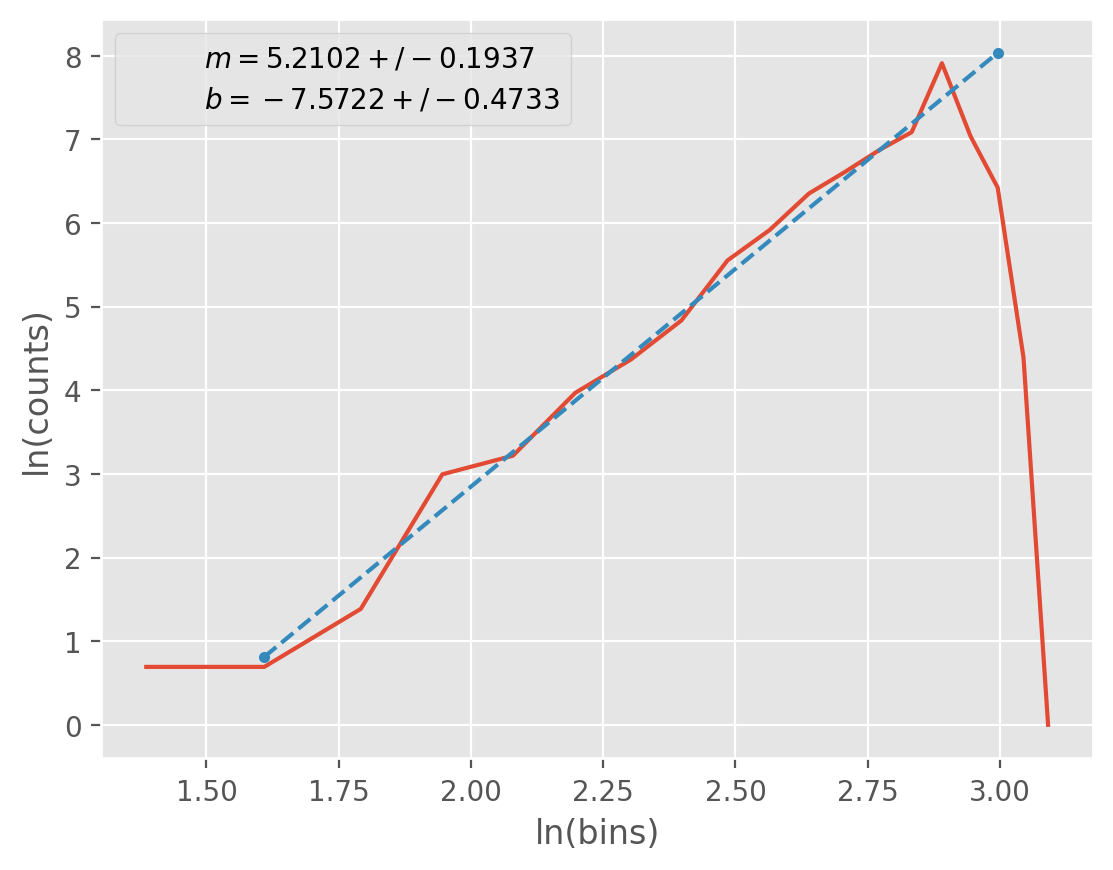

In [195]:
value_locations = np.where(counts > 0)

#general_linear_fit(bins, np.log(counts), 50, 100, "bins", "ln(counts)")
general_linear_fit(np.log(bins[value_locations]), np.log(counts[value_locations]), 1.5, 3, "ln(bins)", "ln(counts)")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


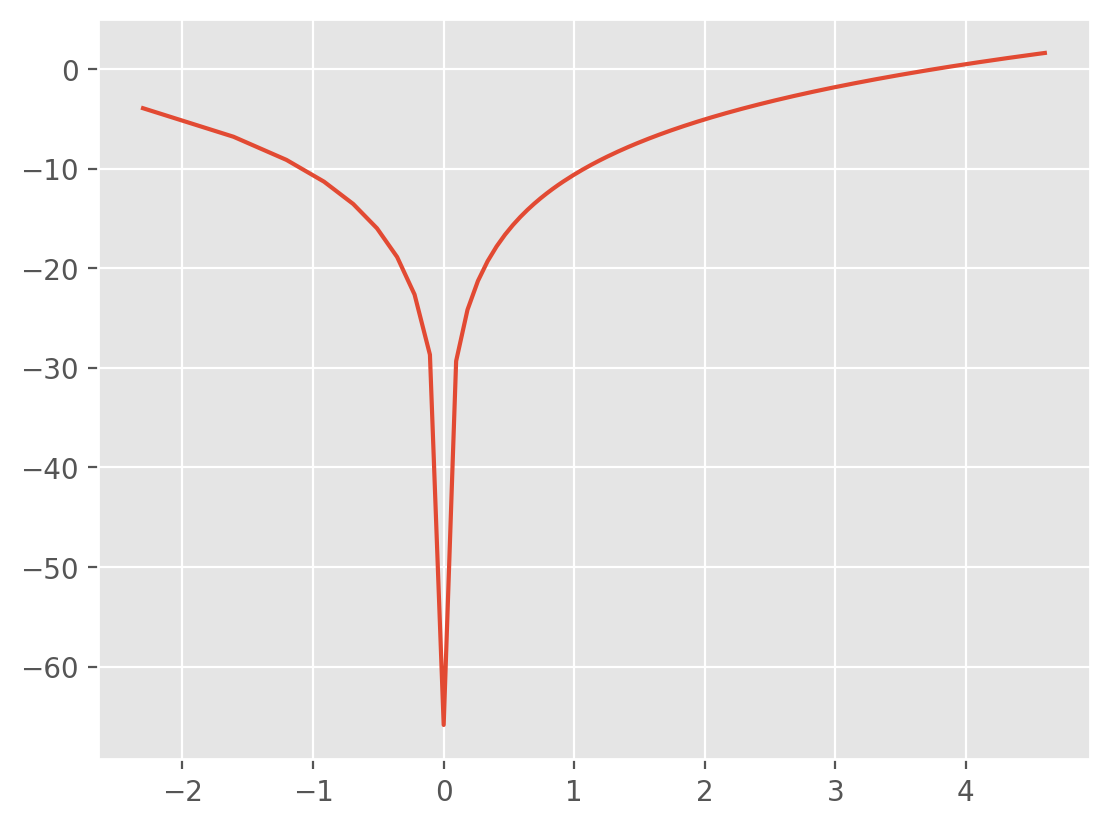

In [167]:
from math import gamma
beta = 0.001
q = 10**-3
alpha = 0.01
x = np.log(np.linspace(0,100, num=1000))
p = (beta/q)**(a/q-1)/gamma(alpha/q-1)*x**(alpha/q-2)*np.exp(-beta*x/q)*np.exp(x)

plt.plot(x,np.log(p))

In [34]:
number_of_points = 100 #may not repeat
data = y_matrix

window_lengths = np.unique(np.exp(np.arange(0,np.log(len(data)),np.log(len(data))/number_of_points)).astype(int))

s, L = no_stripe_entropy(data, window_lengths)

100%|██████████| 81/81 [00:00<00:00, 191.94it/s]


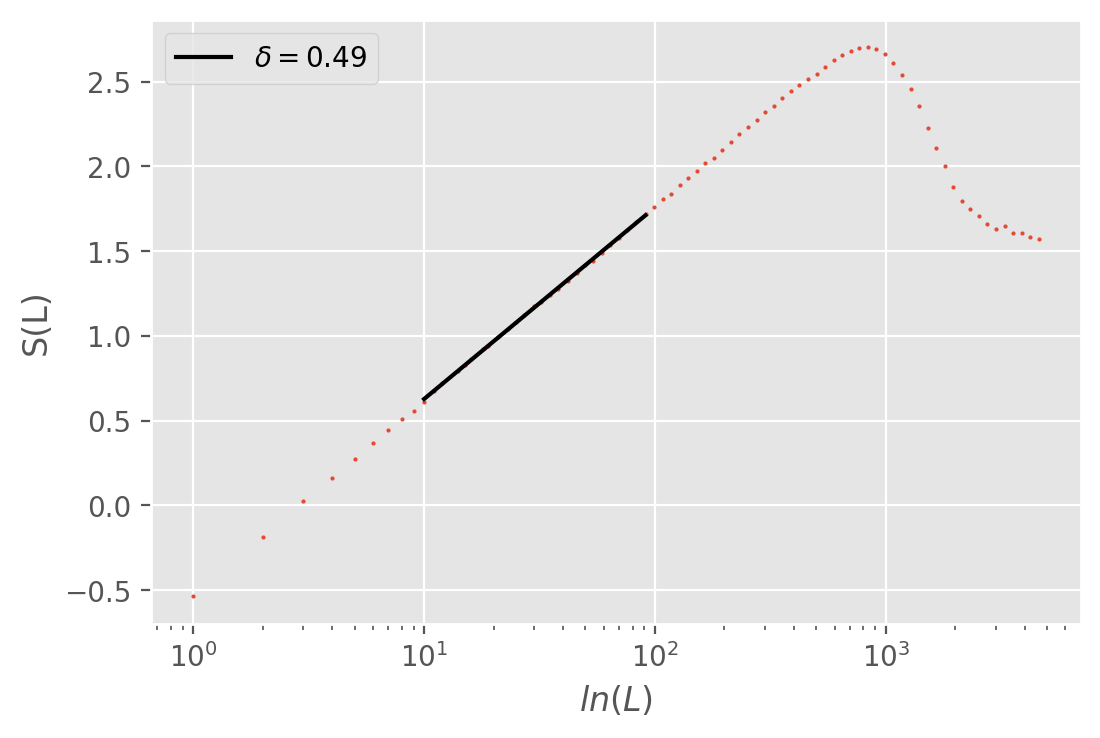

In [36]:
#for fitting and to get the scaling
start = 1*10**1
stop = 1*10**2
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [37]:
data = y_matrix
stripes = 1000
show_plot = False
window_type = 'growing'

rounded_data = apply_stripes(data, stripes, show_plot)
event_array = find_events(rounded_data)
diffusion_trajectory = make_trajectory(event_array)
#window_lengths = np.arange(1, int(0.25*max(np.shape(diffusion_trajectory))), 1500) #1000 points
taus = np.diff(np.where(np.array(event_array[0]) == 1))
window_lengths = np.unique(np.round(np.exp(np.linspace(np.log(np.min(taus)), np.log(np.where(np.array(event_array[0])==1)[0][-1]),100))).astype(int))
s, L = entropy(diffusion_trajectory, window_lengths, window_type)

100%|██████████| 89/89 [00:00<00:00, 220.79it/s]


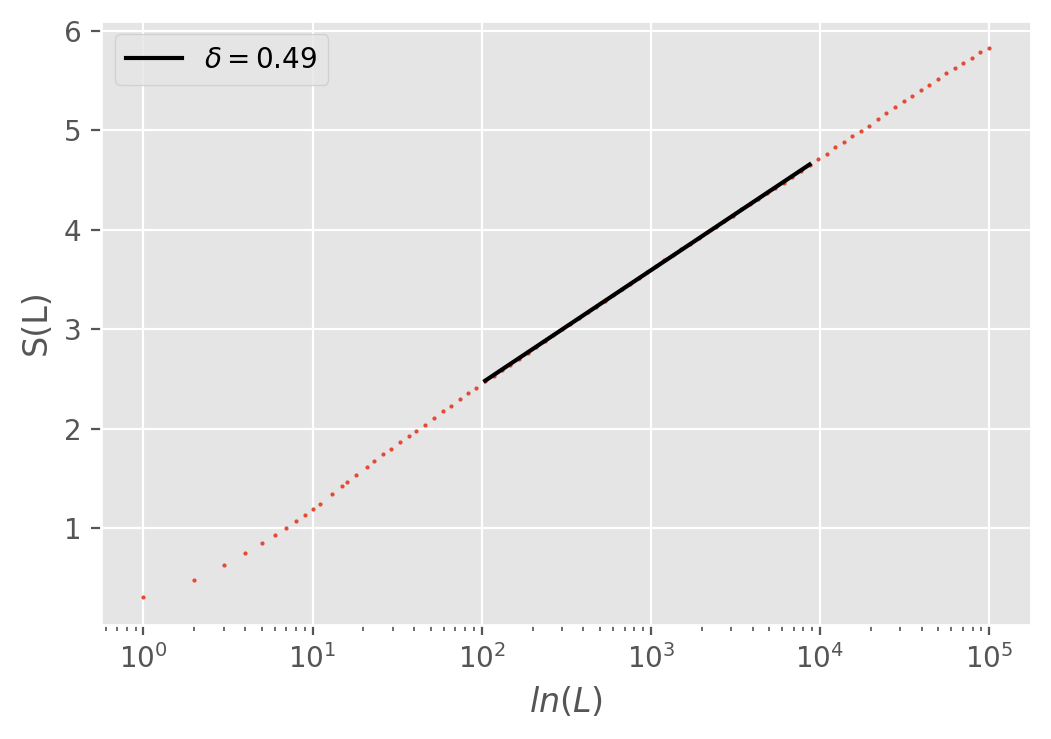

In [39]:
#for fitting and to get the scaling
start = 1*10**2
stop = 1*10**4
fit = get_scaling(s, L, start, stop)
mu = get_mu(fit[1][0])

plt.scatter(L, s, 1)
plt.plot(fit[0], fit[1][0] * np.log(fit[0]) + fit[1][1], color='k',
        label='$\delta = $'+str(np.round(fit[1][0], 2)))
plt.plot([], [], linestyle='')
plt.xscale('log')
plt.xlabel('$ln(L)$')
plt.ylabel('S(L)')
plt.legend(loc=0)

In [95]:
start = 0.0001 #2.3
L = 10**5
a = 0.01
b = 0.0009
D = 0.0099
alpha = 0
lamb = 0
renew = False
plot = False
fpt=0.1 #np.log(a/b)

number_traj = 10000

fpt_y_matrix = np.zeros([number_traj])

for i in tqdm(range(number_traj), desc='outer_loop'):
    fpt_y_matrix[i] = len(log_logistic(start,L,a,b,D,renew,plot,fpt).astype(int))

outer_loop: 100%|██████████| 10000/10000 [00:46<00:00, 217.29it/s]


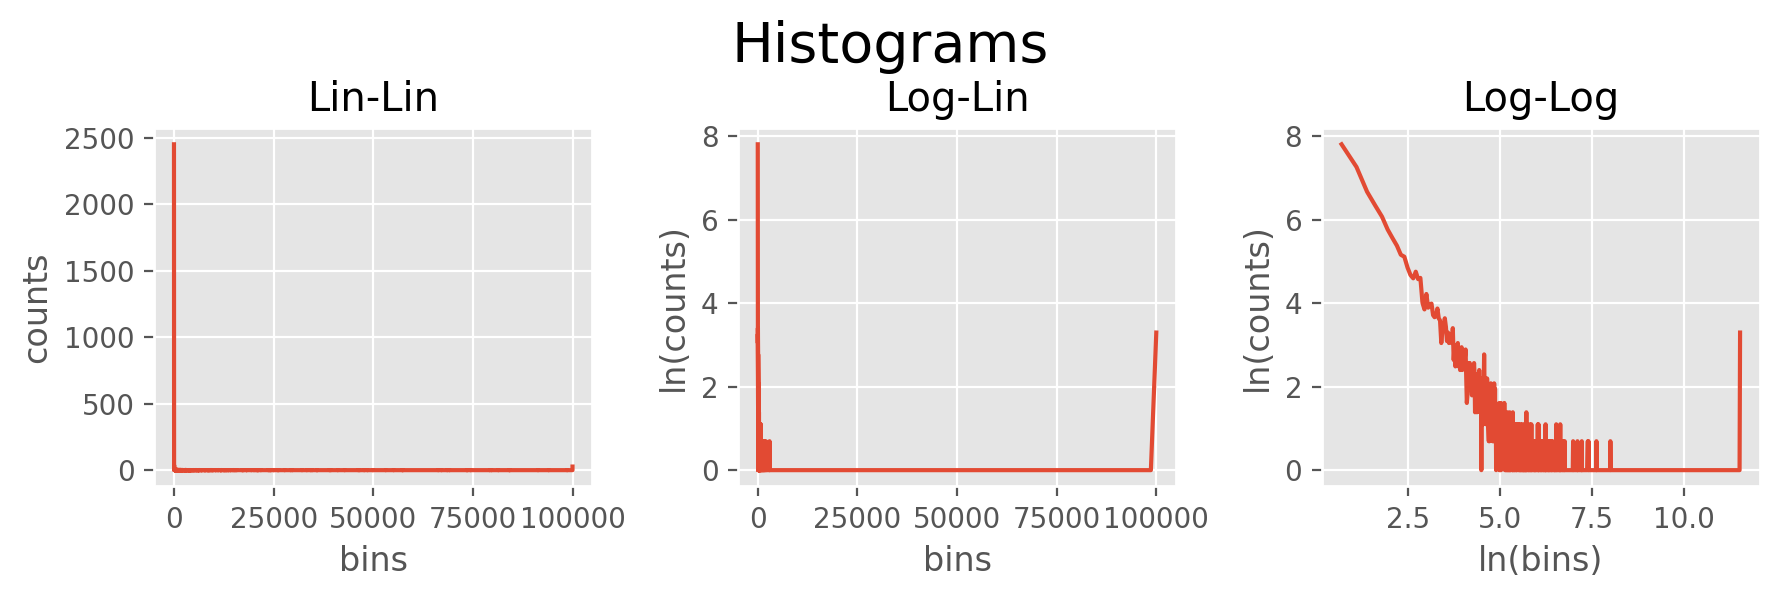

In [96]:
[bins, counts], [bins_n0, counts_n0] = bin_it(fpt_y_matrix.astype(int))

(-1.5726, 8.8375)

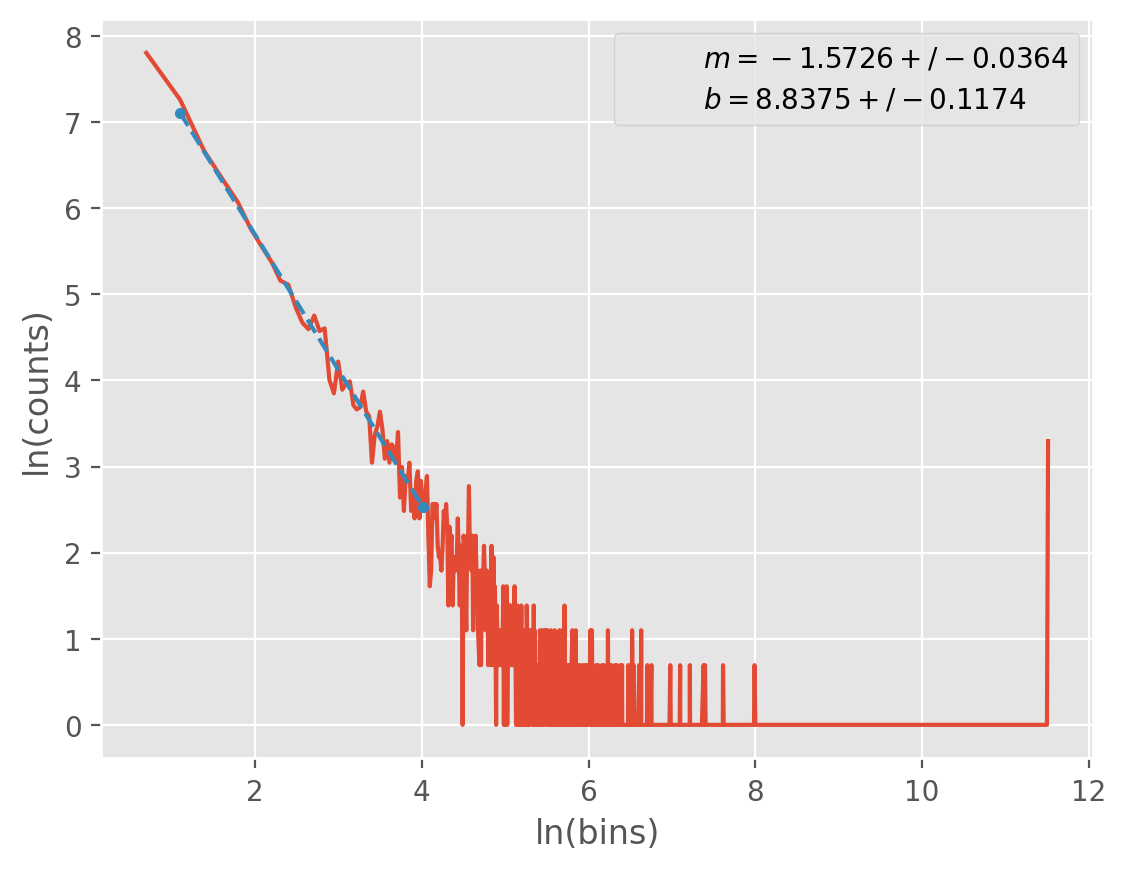

In [98]:
value_locations = np.where(counts > 0)

#general_linear_fit(bins, np.log(counts), 50, 100, "bins", "ln(counts)")
general_linear_fit(np.log(bins[value_locations]), np.log(counts[value_locations]), 1, 4, "ln(bins)", "ln(counts)")

In [41]:
from statsmodels.distributions.empirical_distribution import ECDF

In [99]:
sample = np.hstack((bins_n0, counts_n0))
ecdf = ECDF(sample)
vl = np.where(np.logical_and(ecdf.y>0, ecdf.y<1))

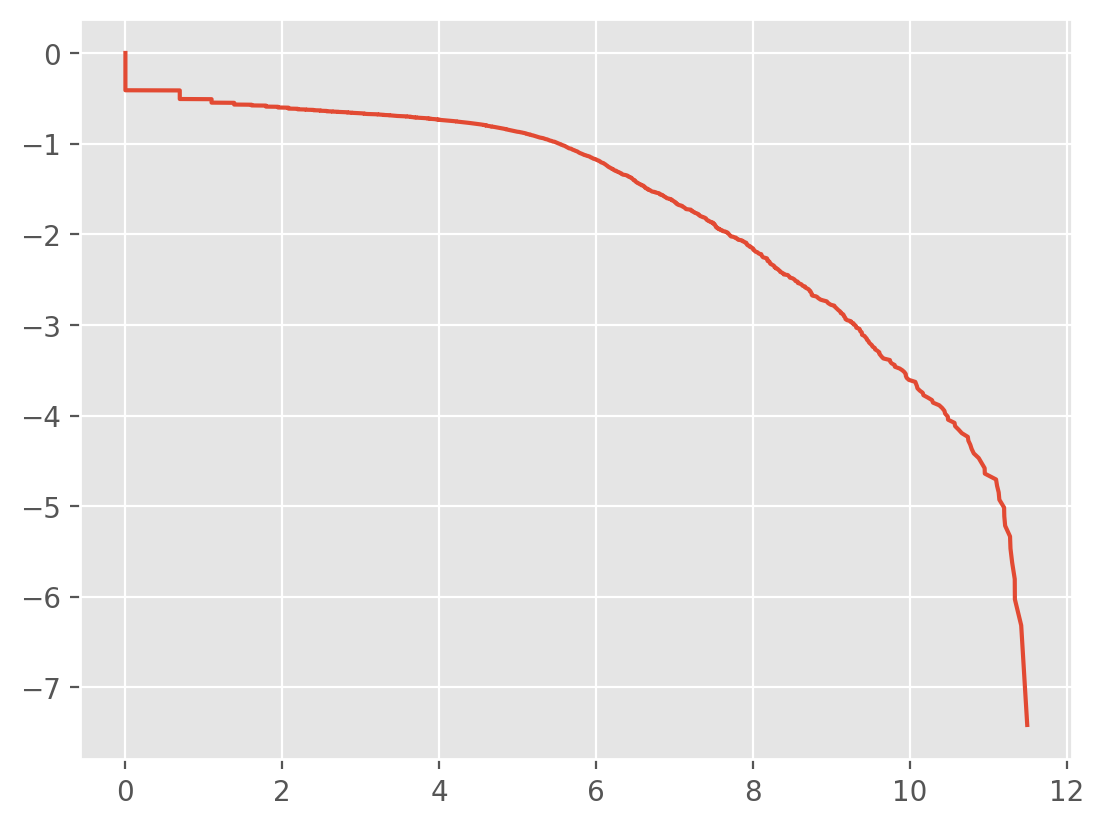

In [100]:
plt.plot(np.log(ecdf.x[vl]), np.log(1-ecdf.y[vl]))

(-0.5664, 2.295)

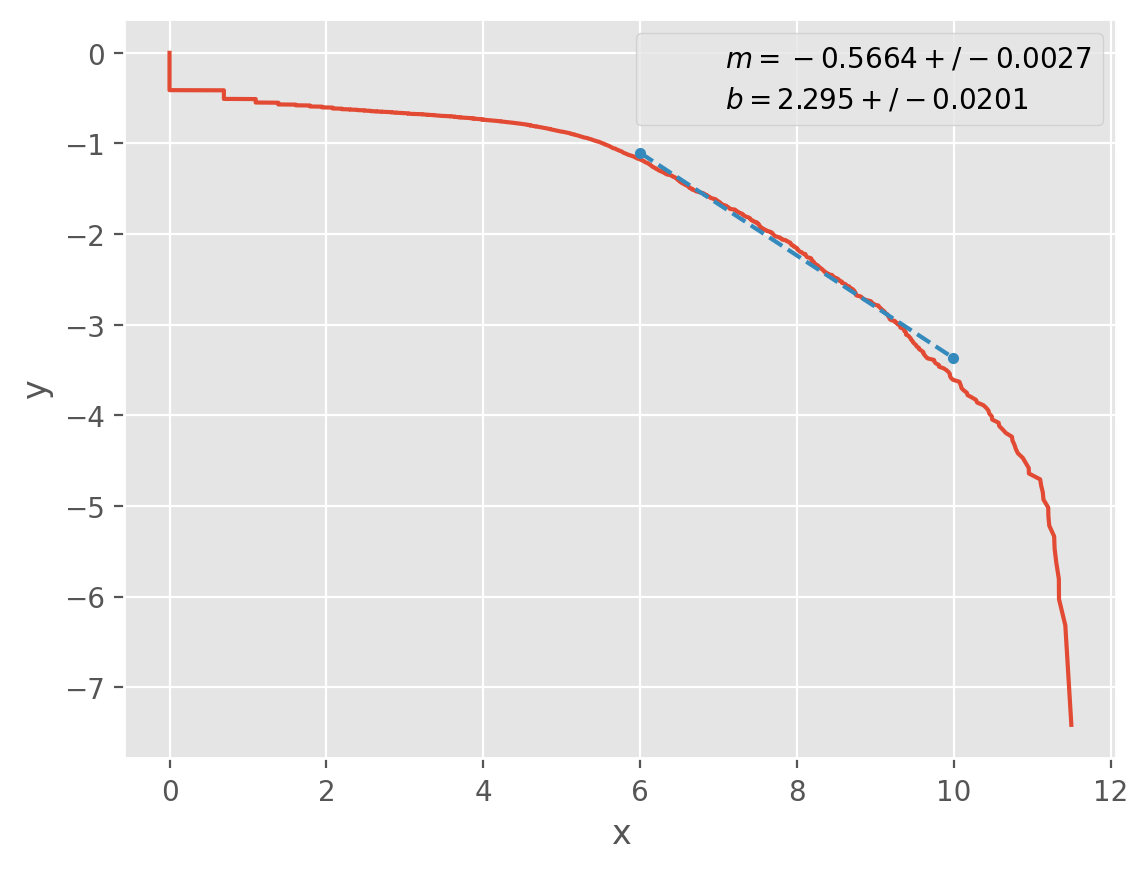

In [102]:
general_linear_fit(np.log(ecdf.x[vl]), np.log(1-ecdf.y[vl]), 6, 10, xlabel="x",ylabel='y')

In [17]:
print(np.log(ecdf.x))

[       nan 0.         0.         ... 7.39878628 7.48549161 7.65349491]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [13]:
np.log(1-ecdf.y)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([ 0.00000000e+00, -7.07463772e-04, -1.41542840e-03, ...,
       -6.56103067e+00, -7.25417785e+00,            -inf])

In [37]:
D/4*(a/D-2)**2

0.016